# Functional and GO Pathway Associations: Hierarchical Clustering Dendrogram


In [ ]:
import pandas as pd

# Define file paths
file_paths = [
    '/content/27FA-CC.xlsx', '/content/27FA-MF.xlsx', '/content/27FA_BP.xlsx',
    '/content/27GO-CC.xlsx', '/content/27GO-MF.xlsx', '/content/27GO_BP.xlsx',
    '/content/94FA-BP.xlsx', '/content/94FA-CC.xlsx', '/content/94FA-MF.xlsx',
    '/content/94GO-CC.xlsx', '/content/94GO-MF.xlsx', '/content/94Go-BP.xlsx',
    '/content/ProBP_FA.xlsx', '/content/ProBP_GO.xlsx', '/content/ProCC_FA.xlsx',
    '/content/ProCC_GO.xlsx', '/content/ProMF_FA.xlsx', '/content/ProMF_GO.xlsx'
]

# Initialize an empty DataFrame to store gene frequencies
gene_frequency = pd.DataFrame()

# Process each file
for file_path in file_paths:
    df = pd.read_excel(file_path)
    genes = df['Genes'].str.split(',').explode().str.strip()
    gene_counts = genes.value_counts().reset_index()
    gene_counts.columns = ['Gene', 'Frequency']
    gene_counts['File'] = file_path.split('/')[-1]
    gene_frequency = pd.concat([gene_frequency, gene_counts])

# Save the gene frequency data to a new CSV file
gene_frequency.to_csv('gene_frequency.csv', index=False)

# Display the first few rows of the gene frequency DataFrame
print(gene_frequency.head())


     Gene  Frequency          File
0  GRIN2B          6  27FA-CC.xlsx
1   CXCR4          5  27FA-CC.xlsx
2   ITGB3          5  27FA-CC.xlsx
3     KDR          4  27FA-CC.xlsx
4   GRIN1          4  27FA-CC.xlsx


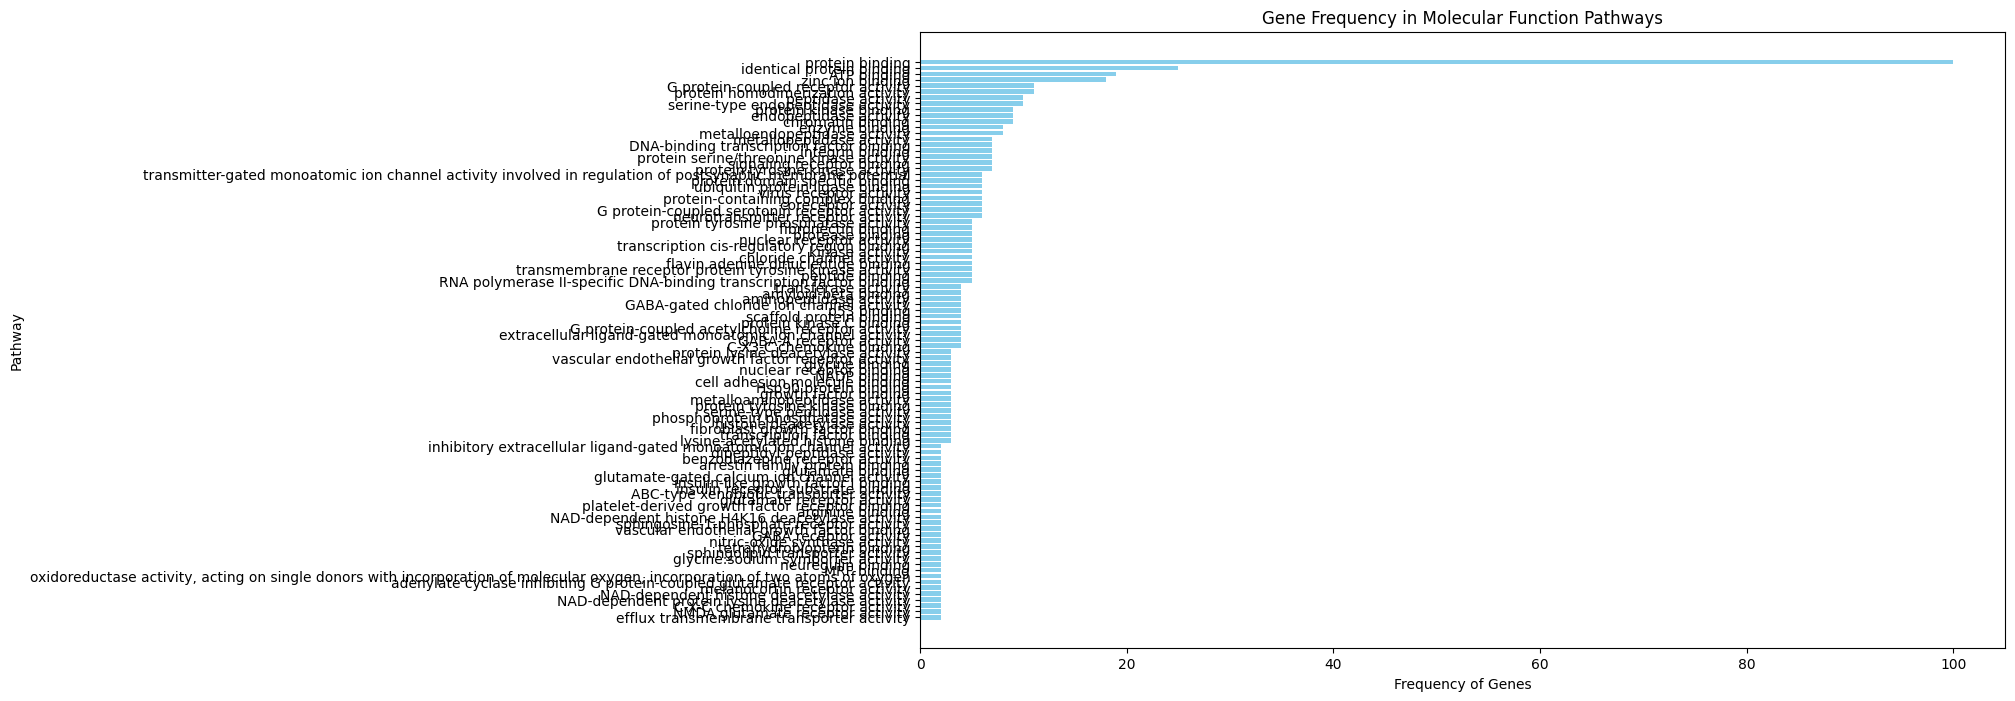

In [ ]:
# Create a bar plot for gene frequency
plt.figure(figsize=(14, 8))
df_sorted = df.sort_values('Frequency', ascending=False)
plt.barh(df_sorted['Pathway'], df_sorted['Frequency'], color='skyblue')
plt.xlabel('Frequency of Genes')
plt.ylabel('Pathway')
plt.title('Gene Frequency in Molecular Function Pathways')
plt.gca().invert_yaxis()
plt.show()


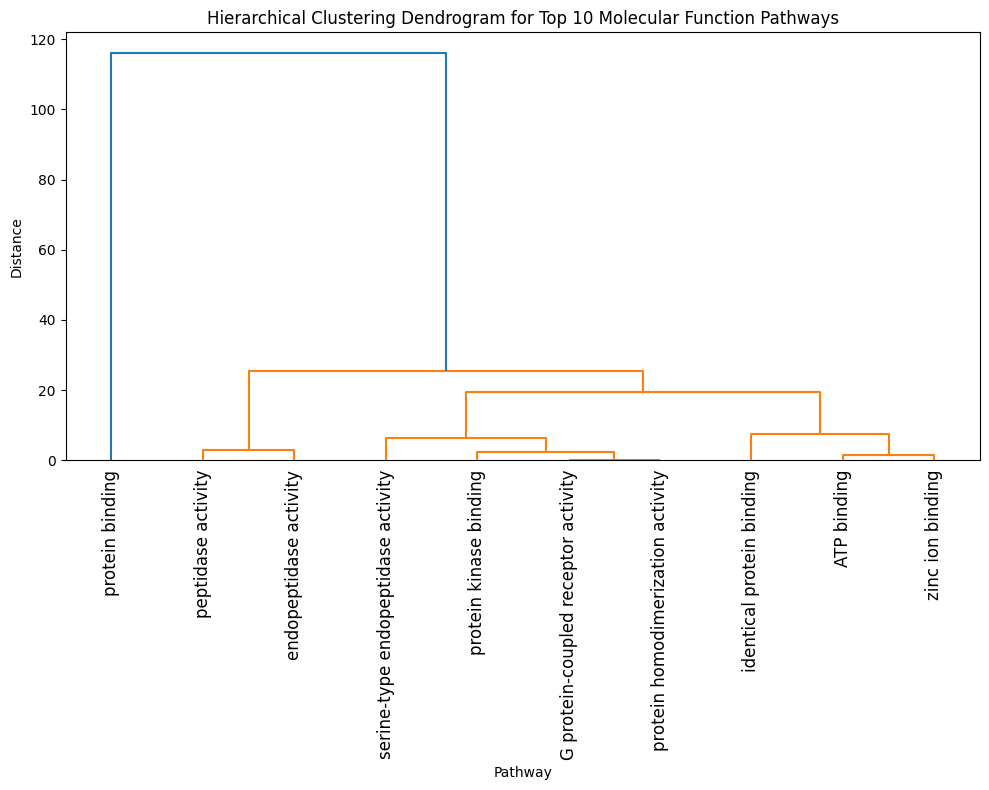

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/27go.xlsx'
df = pd.read_excel(file_path)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=top_pathways['Pathway'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecular Function Pathways')
plt.xlabel('Pathway')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


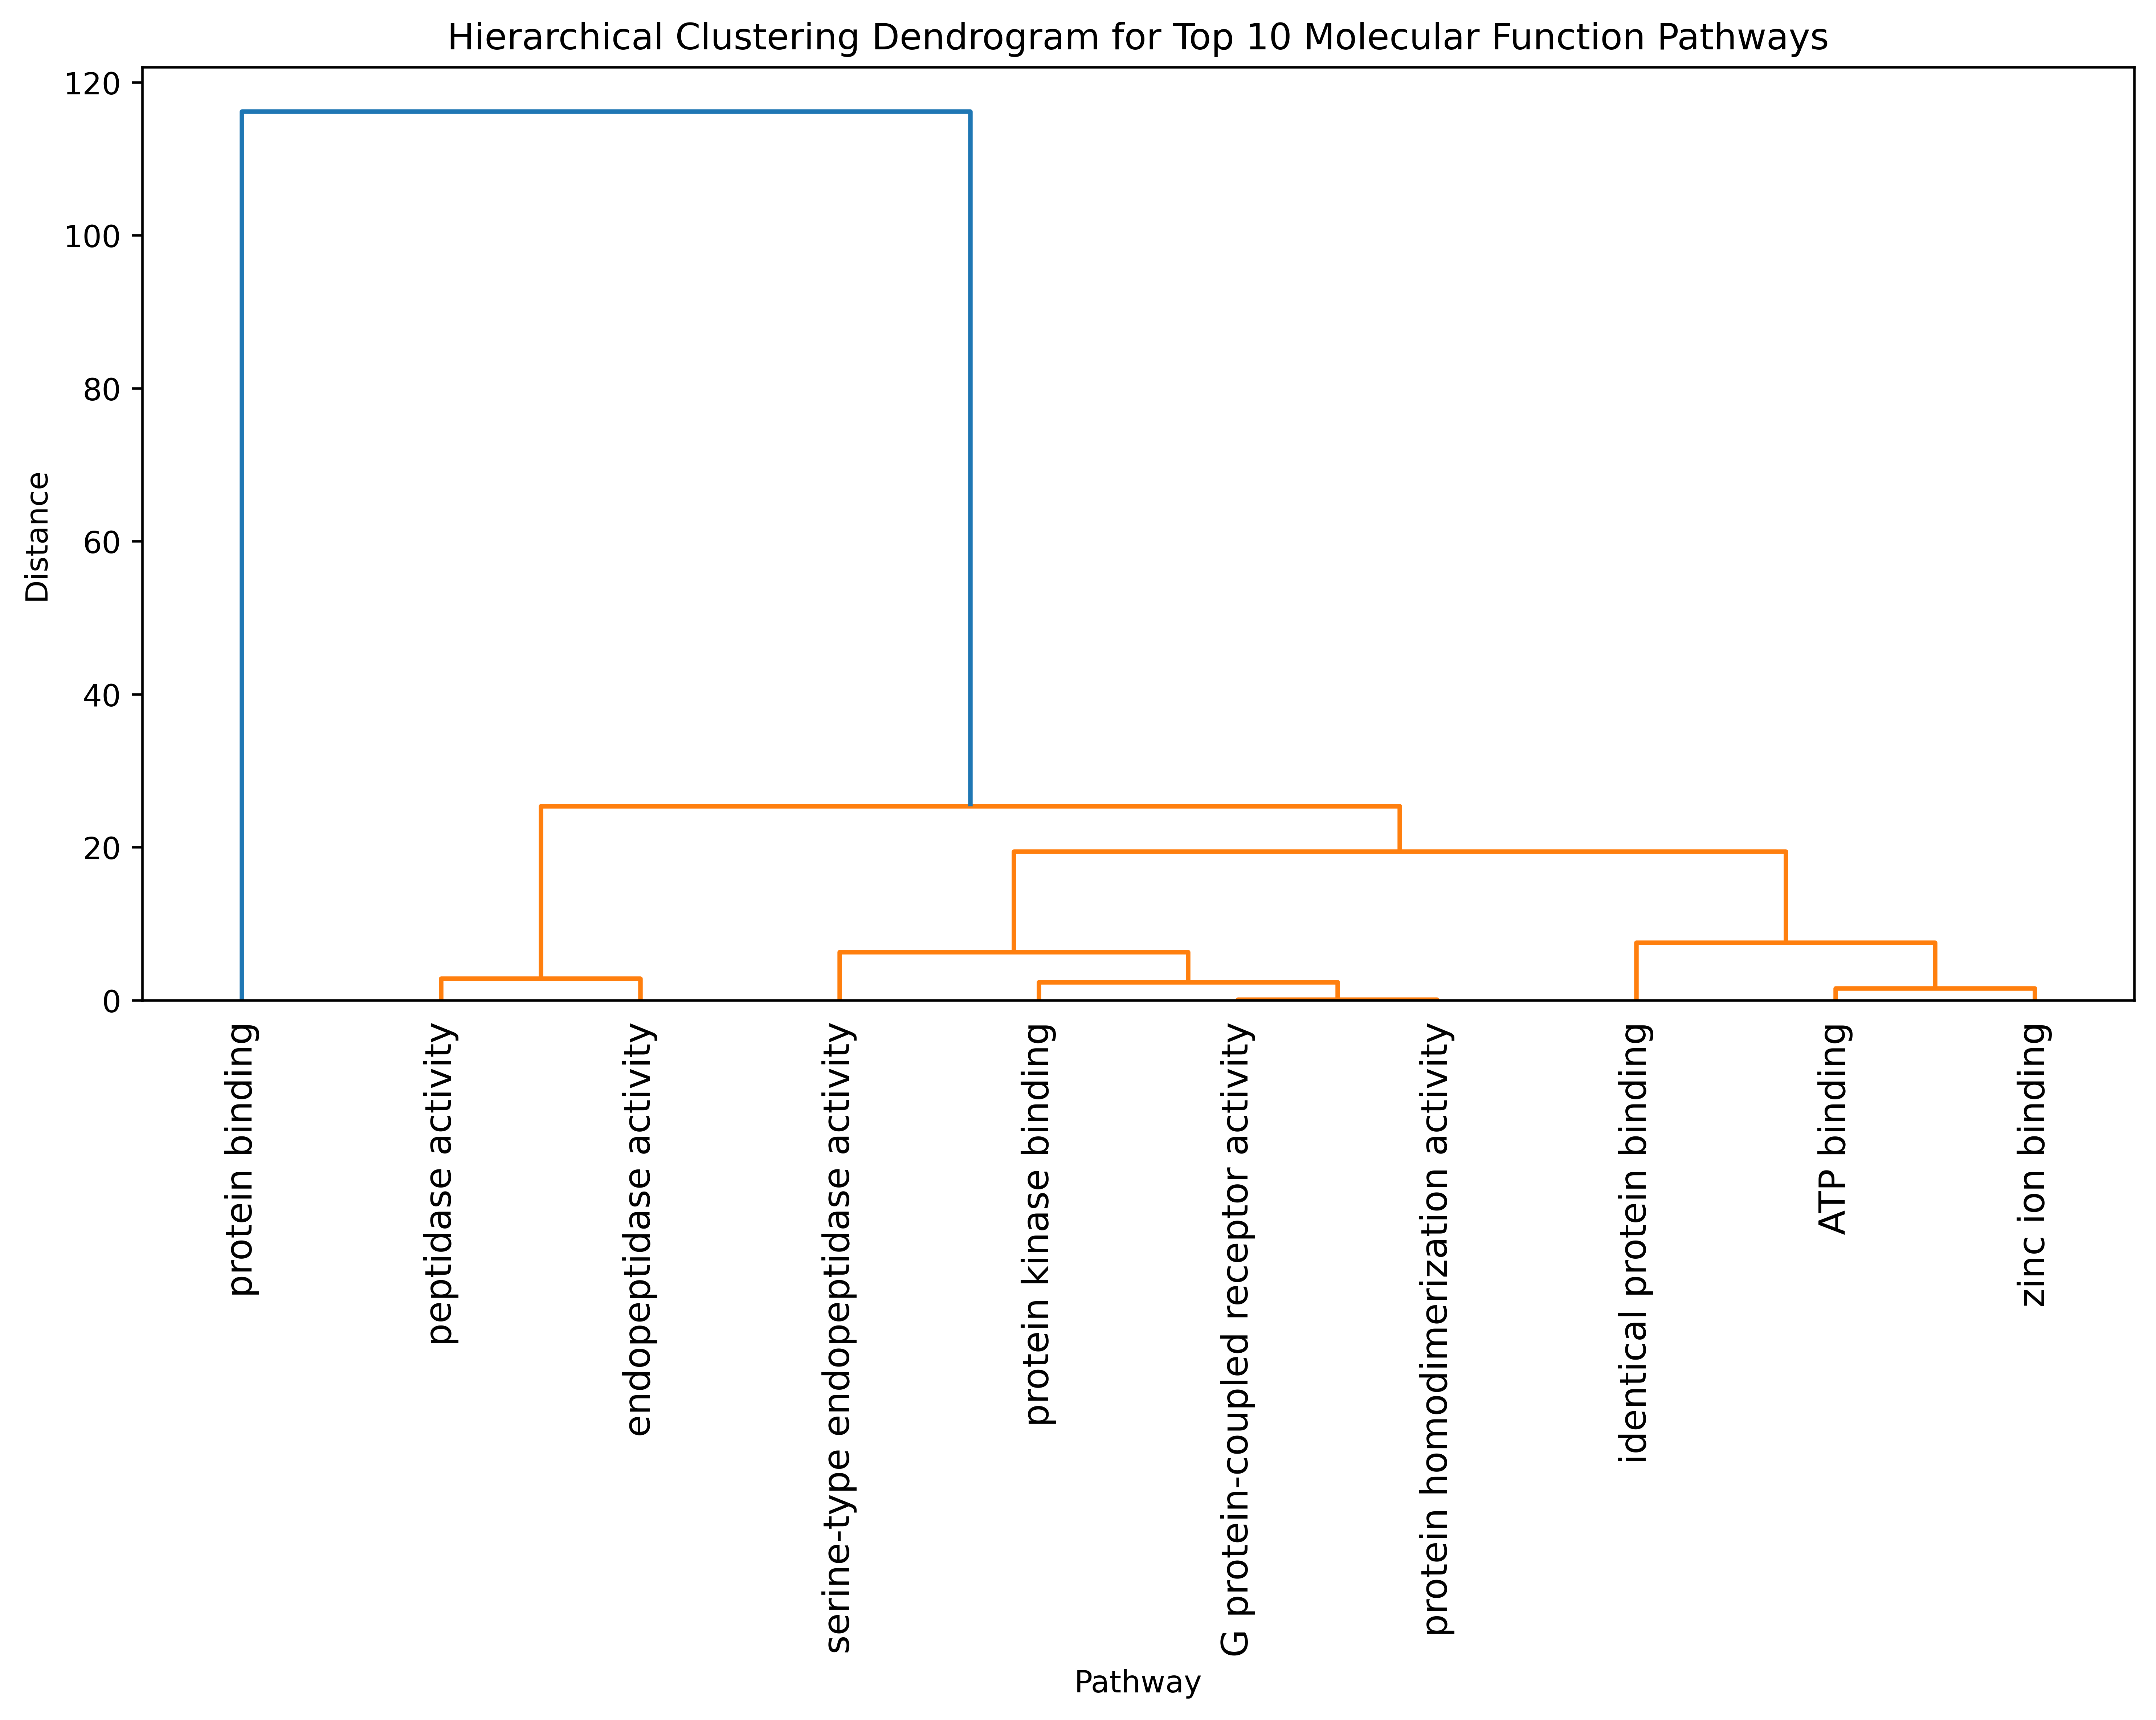

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/27go.xlsx'
df = pd.read_excel(file_path)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['Pathway'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecular Function Pathways')
plt.xlabel('Pathway')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


<Figure size 7200x6000 with 0 Axes>

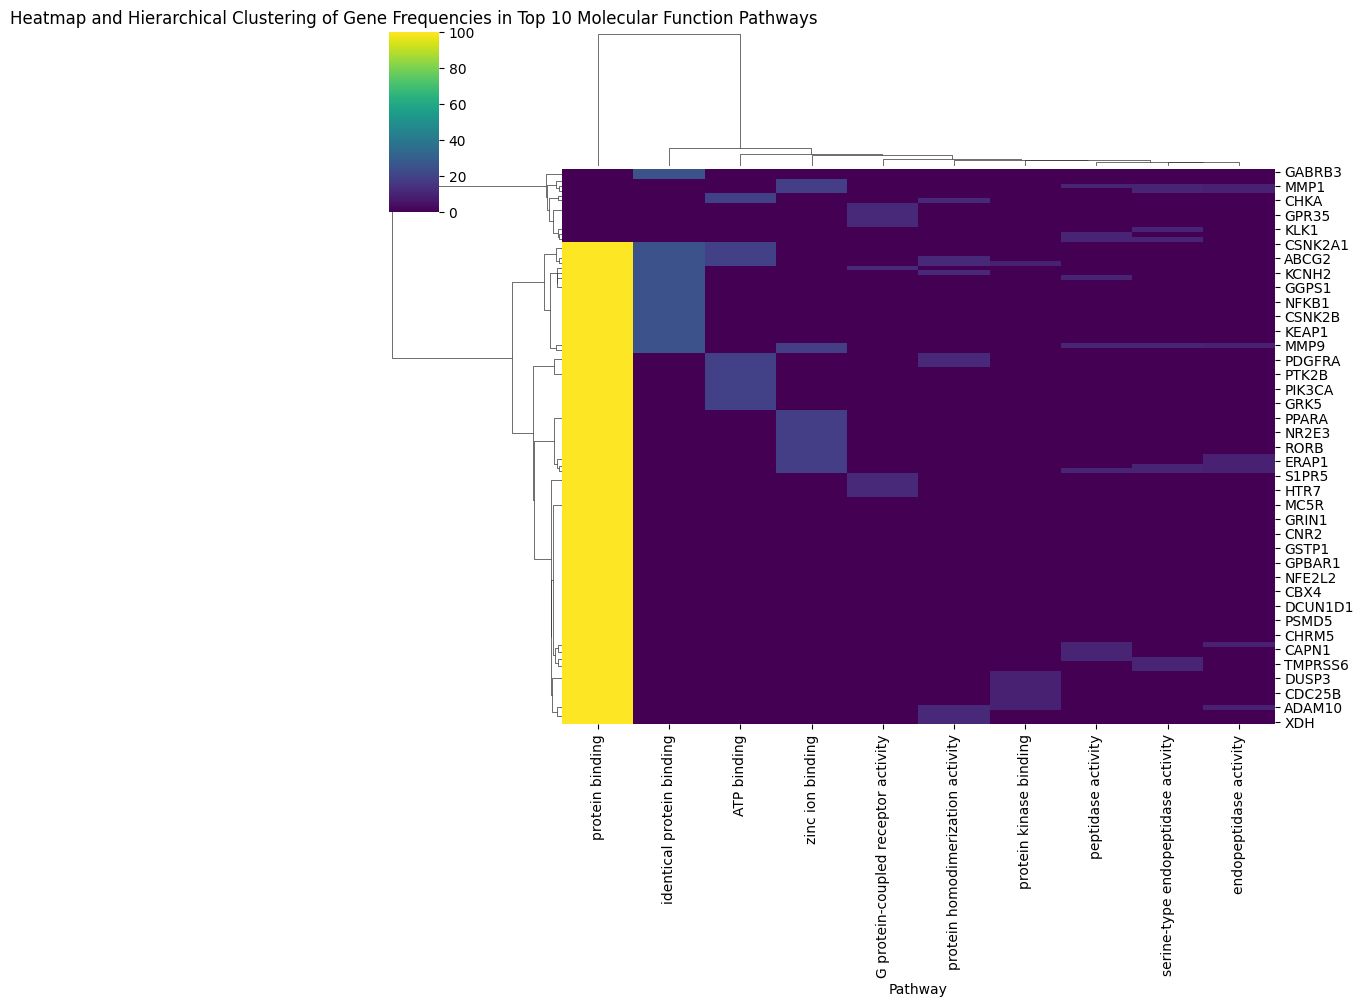

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/27go.xlsx'
df = pd.read_excel(file_path)

# Ensure the column names are appropriate
df.columns = ['Pathway', 'Frequency', 'PValue', 'Genes', 'Fold Enrichment', 'FDR']

# Filter the top 10 pathways based on Frequency
top_pathways = df.nlargest(10, 'Frequency')

# Extract the gene list and convert it to a format suitable for heatmap
gene_list = top_pathways['Genes'].str.split(',').explode().str.strip().unique()
heatmap_data = pd.DataFrame(index=gene_list, columns=top_pathways['Pathway'])

# Fill in the heatmap data with frequencies
for index, row in top_pathways.iterrows():
    genes = row['Genes'].split(',')
    for gene in genes:
        heatmap_data.at[gene.strip(), row['Pathway']] = row['Frequency']

# Replace NaN with 0 for the heatmap
heatmap_data = heatmap_data.fillna(0).astype(int)

# Perform hierarchical clustering
linkage_matrix = linkage(heatmap_data, method='ward')

# Plot the heatmap with dendrograms
plt.figure(figsize=(12, 10), dpi=600)
sns.clustermap(heatmap_data, row_linkage=linkage_matrix, col_cluster=True, cmap="viridis", figsize=(10, 10))
plt.title("Heatmap and Hierarchical Clustering of Gene Frequencies in Top 10 Molecular Function Pathways")
plt.savefig("/content/27go.xlsx.png", dpi=600)
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Display the column names
print(df.columns)


Index(['GO_Biological Process', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


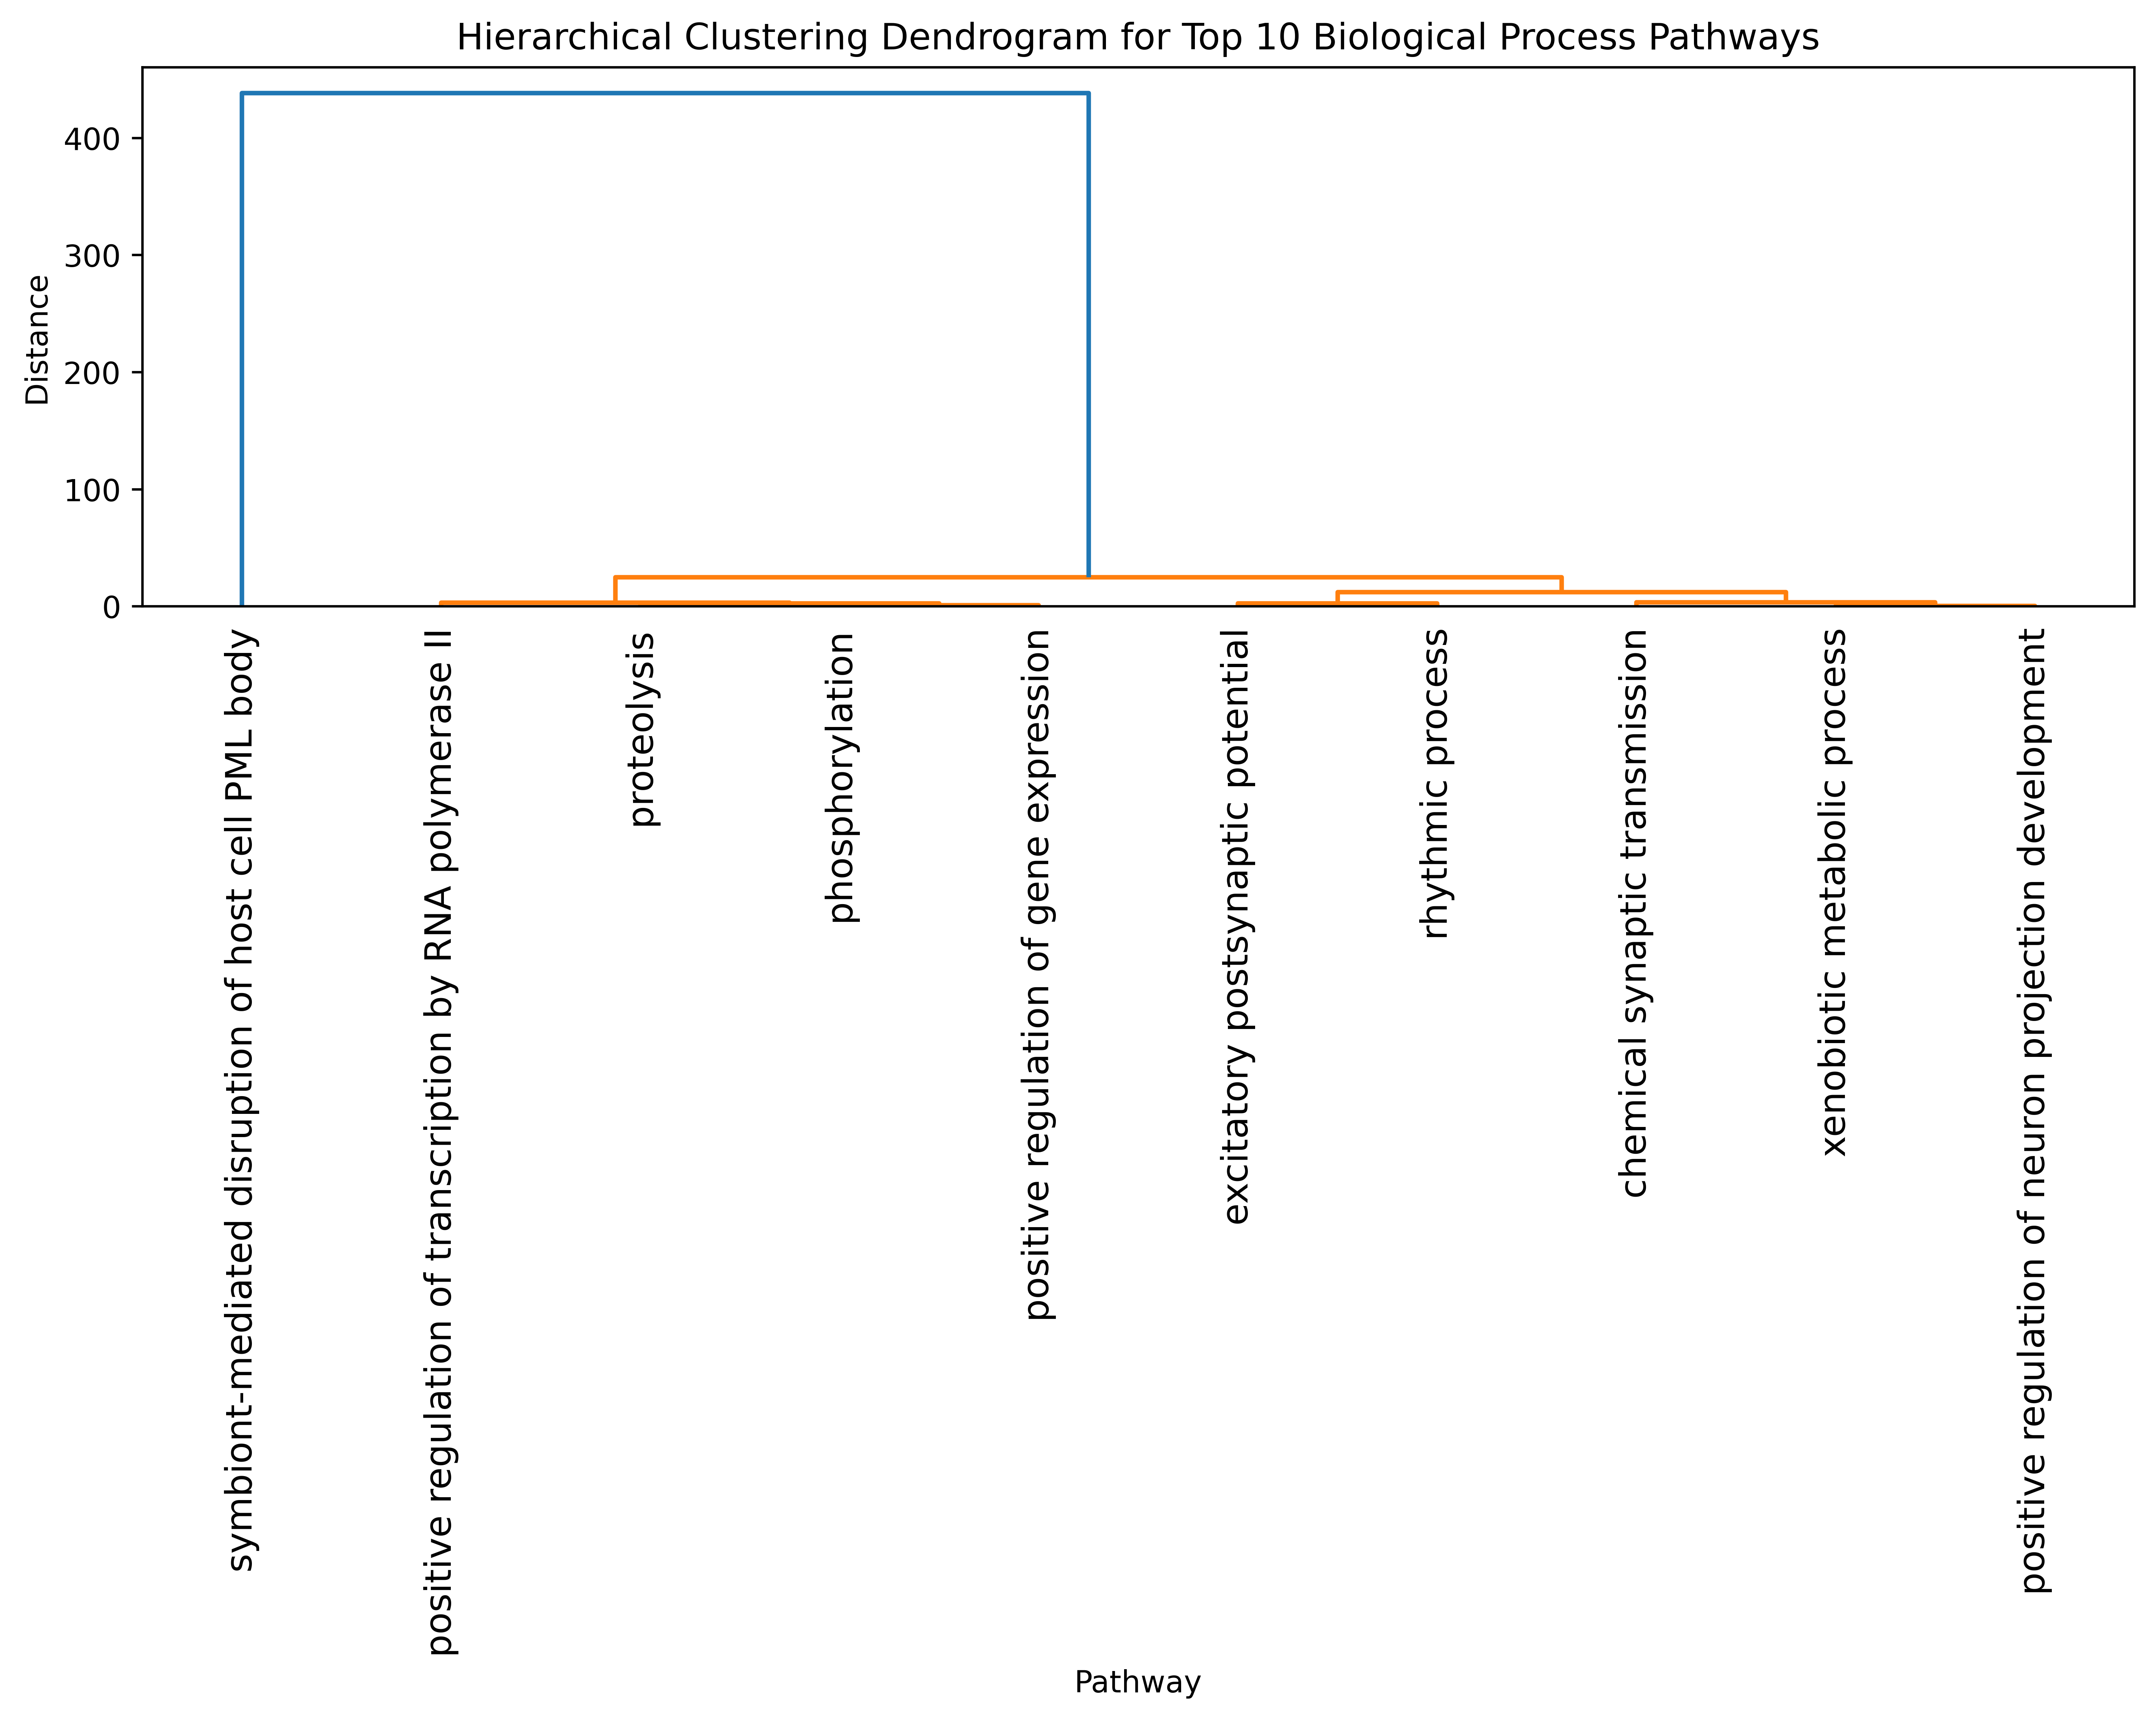

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['GO_Biological Process'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Biological Process Pathways')
plt.xlabel('Pathway')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


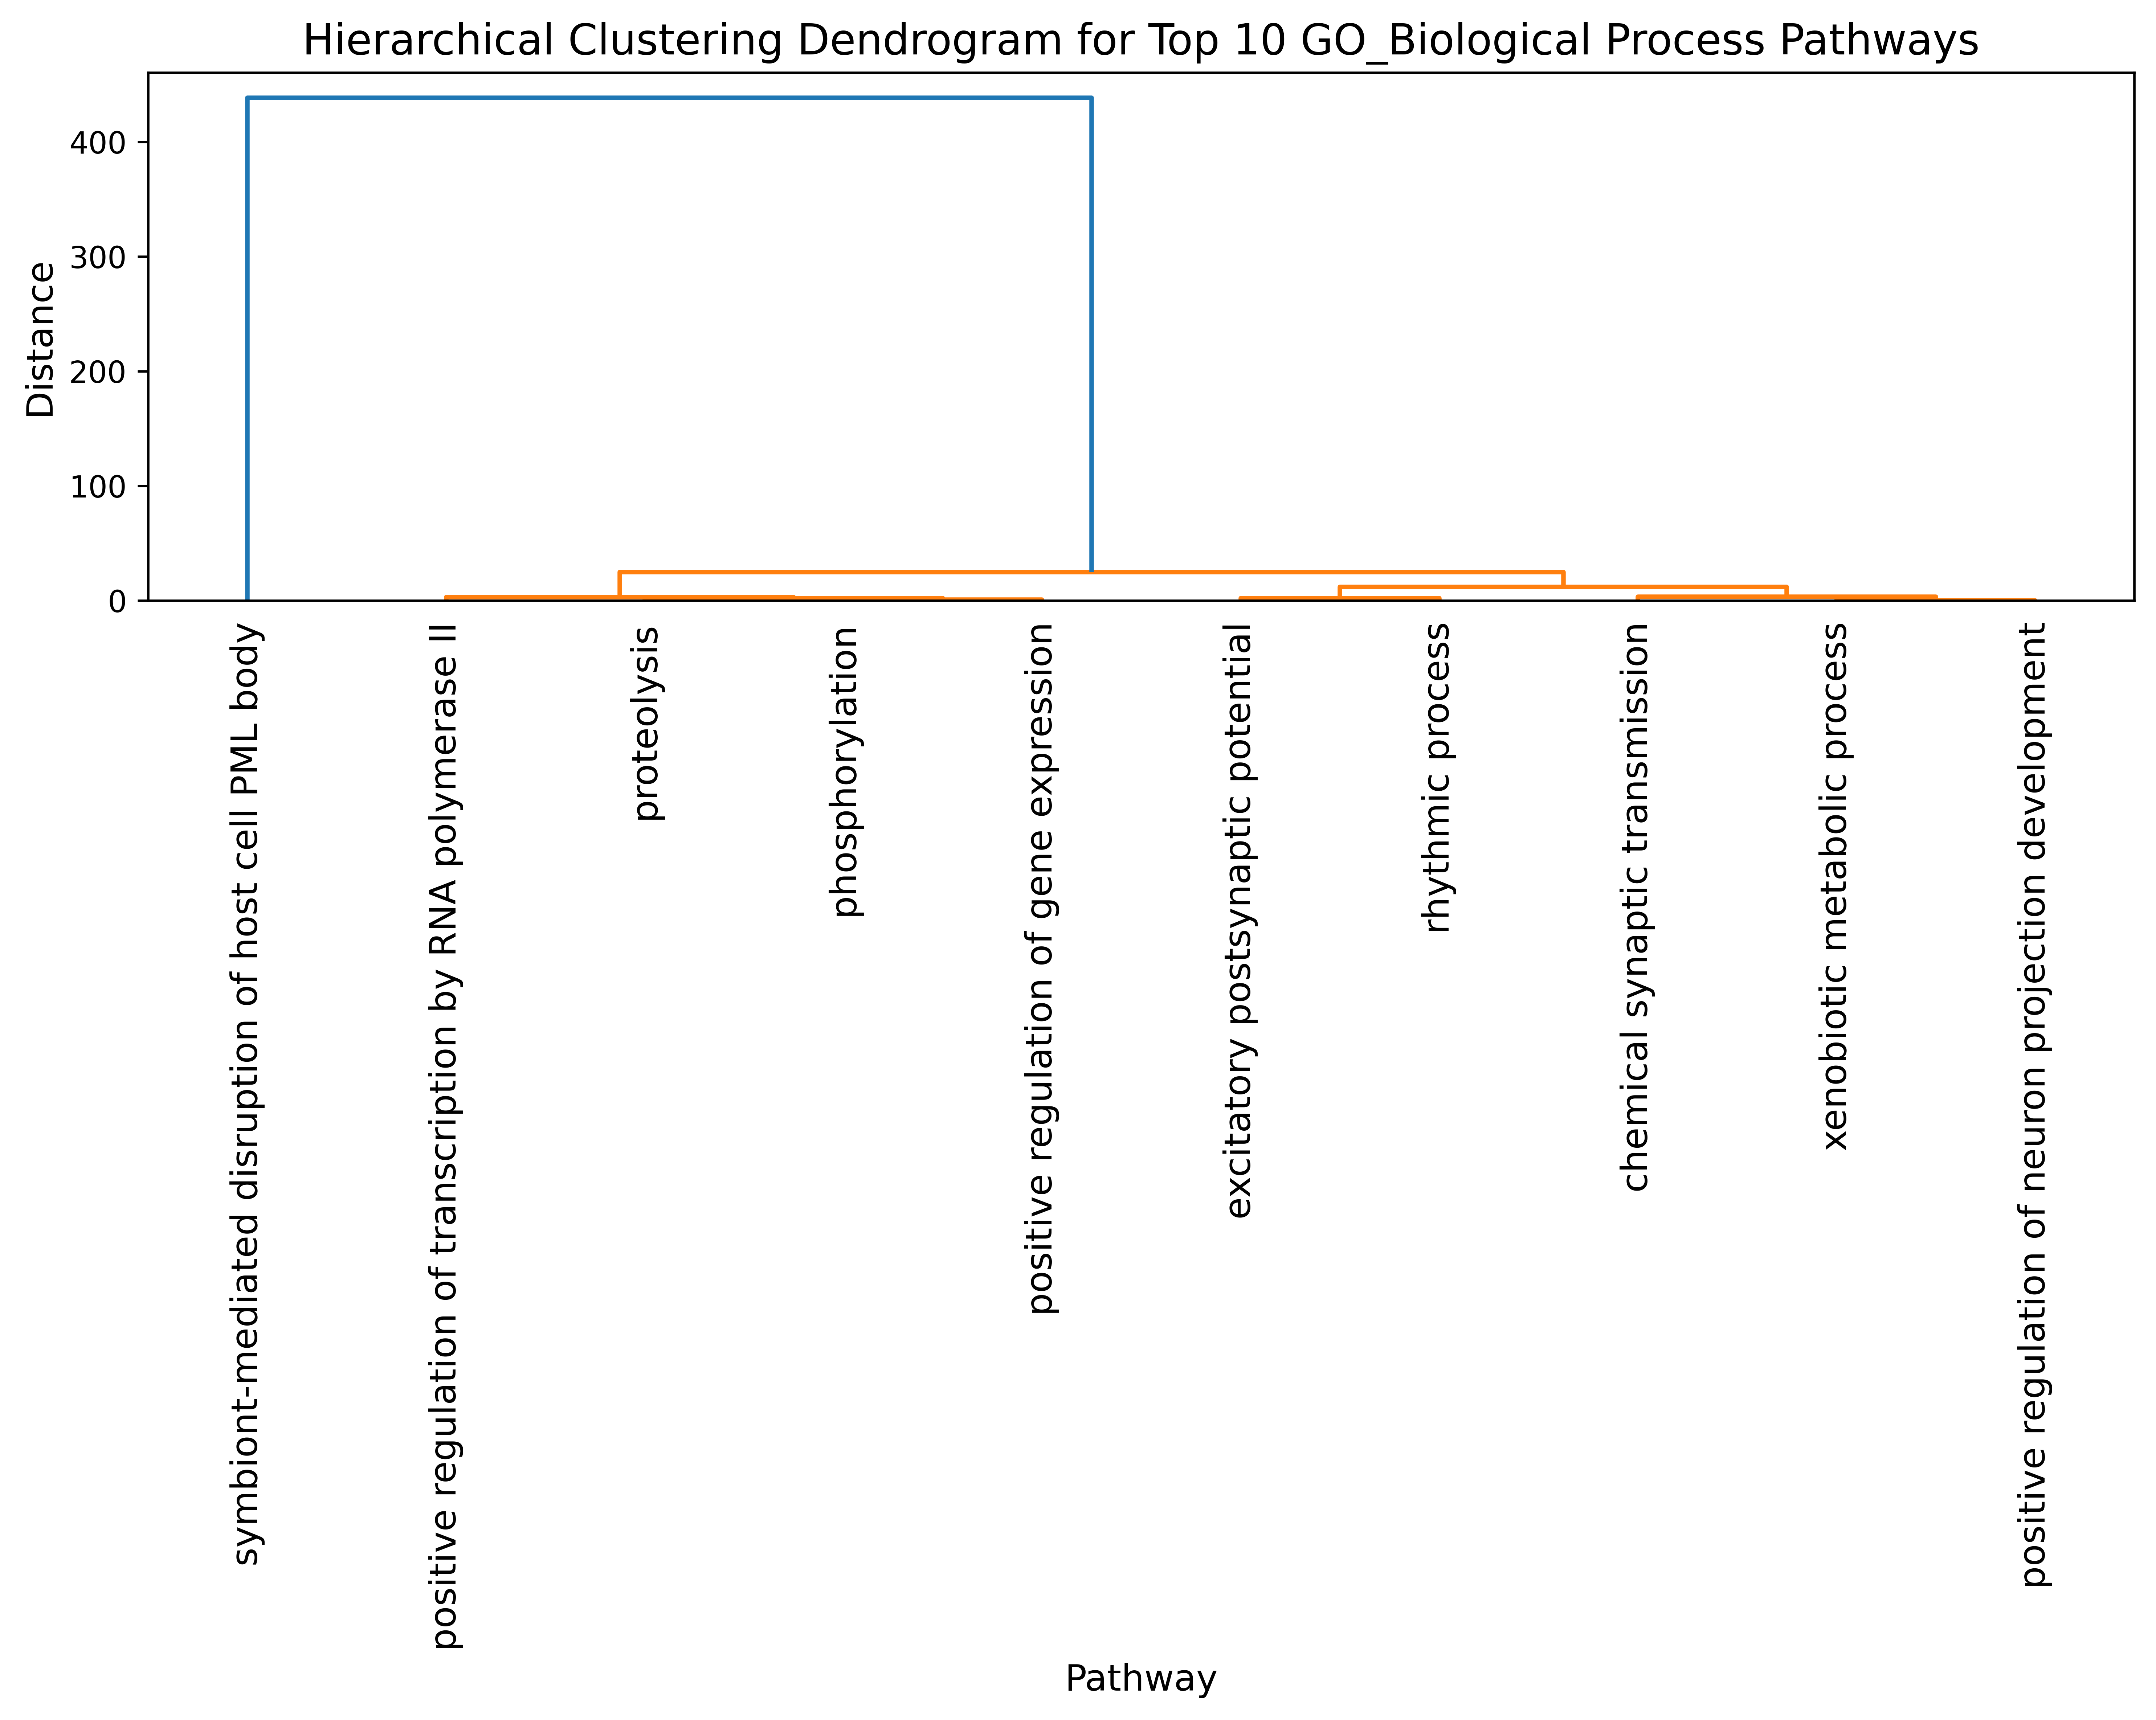

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['GO_Biological Process'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO_Biological Process Pathways', fontsize=14)
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()

# Save the figure
plt.savefig('/content/hierarchical_clustering_dendrogram_GO_Biological Process.png')

# Show the plot
plt.show()


Index(['GO_Biological Process', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


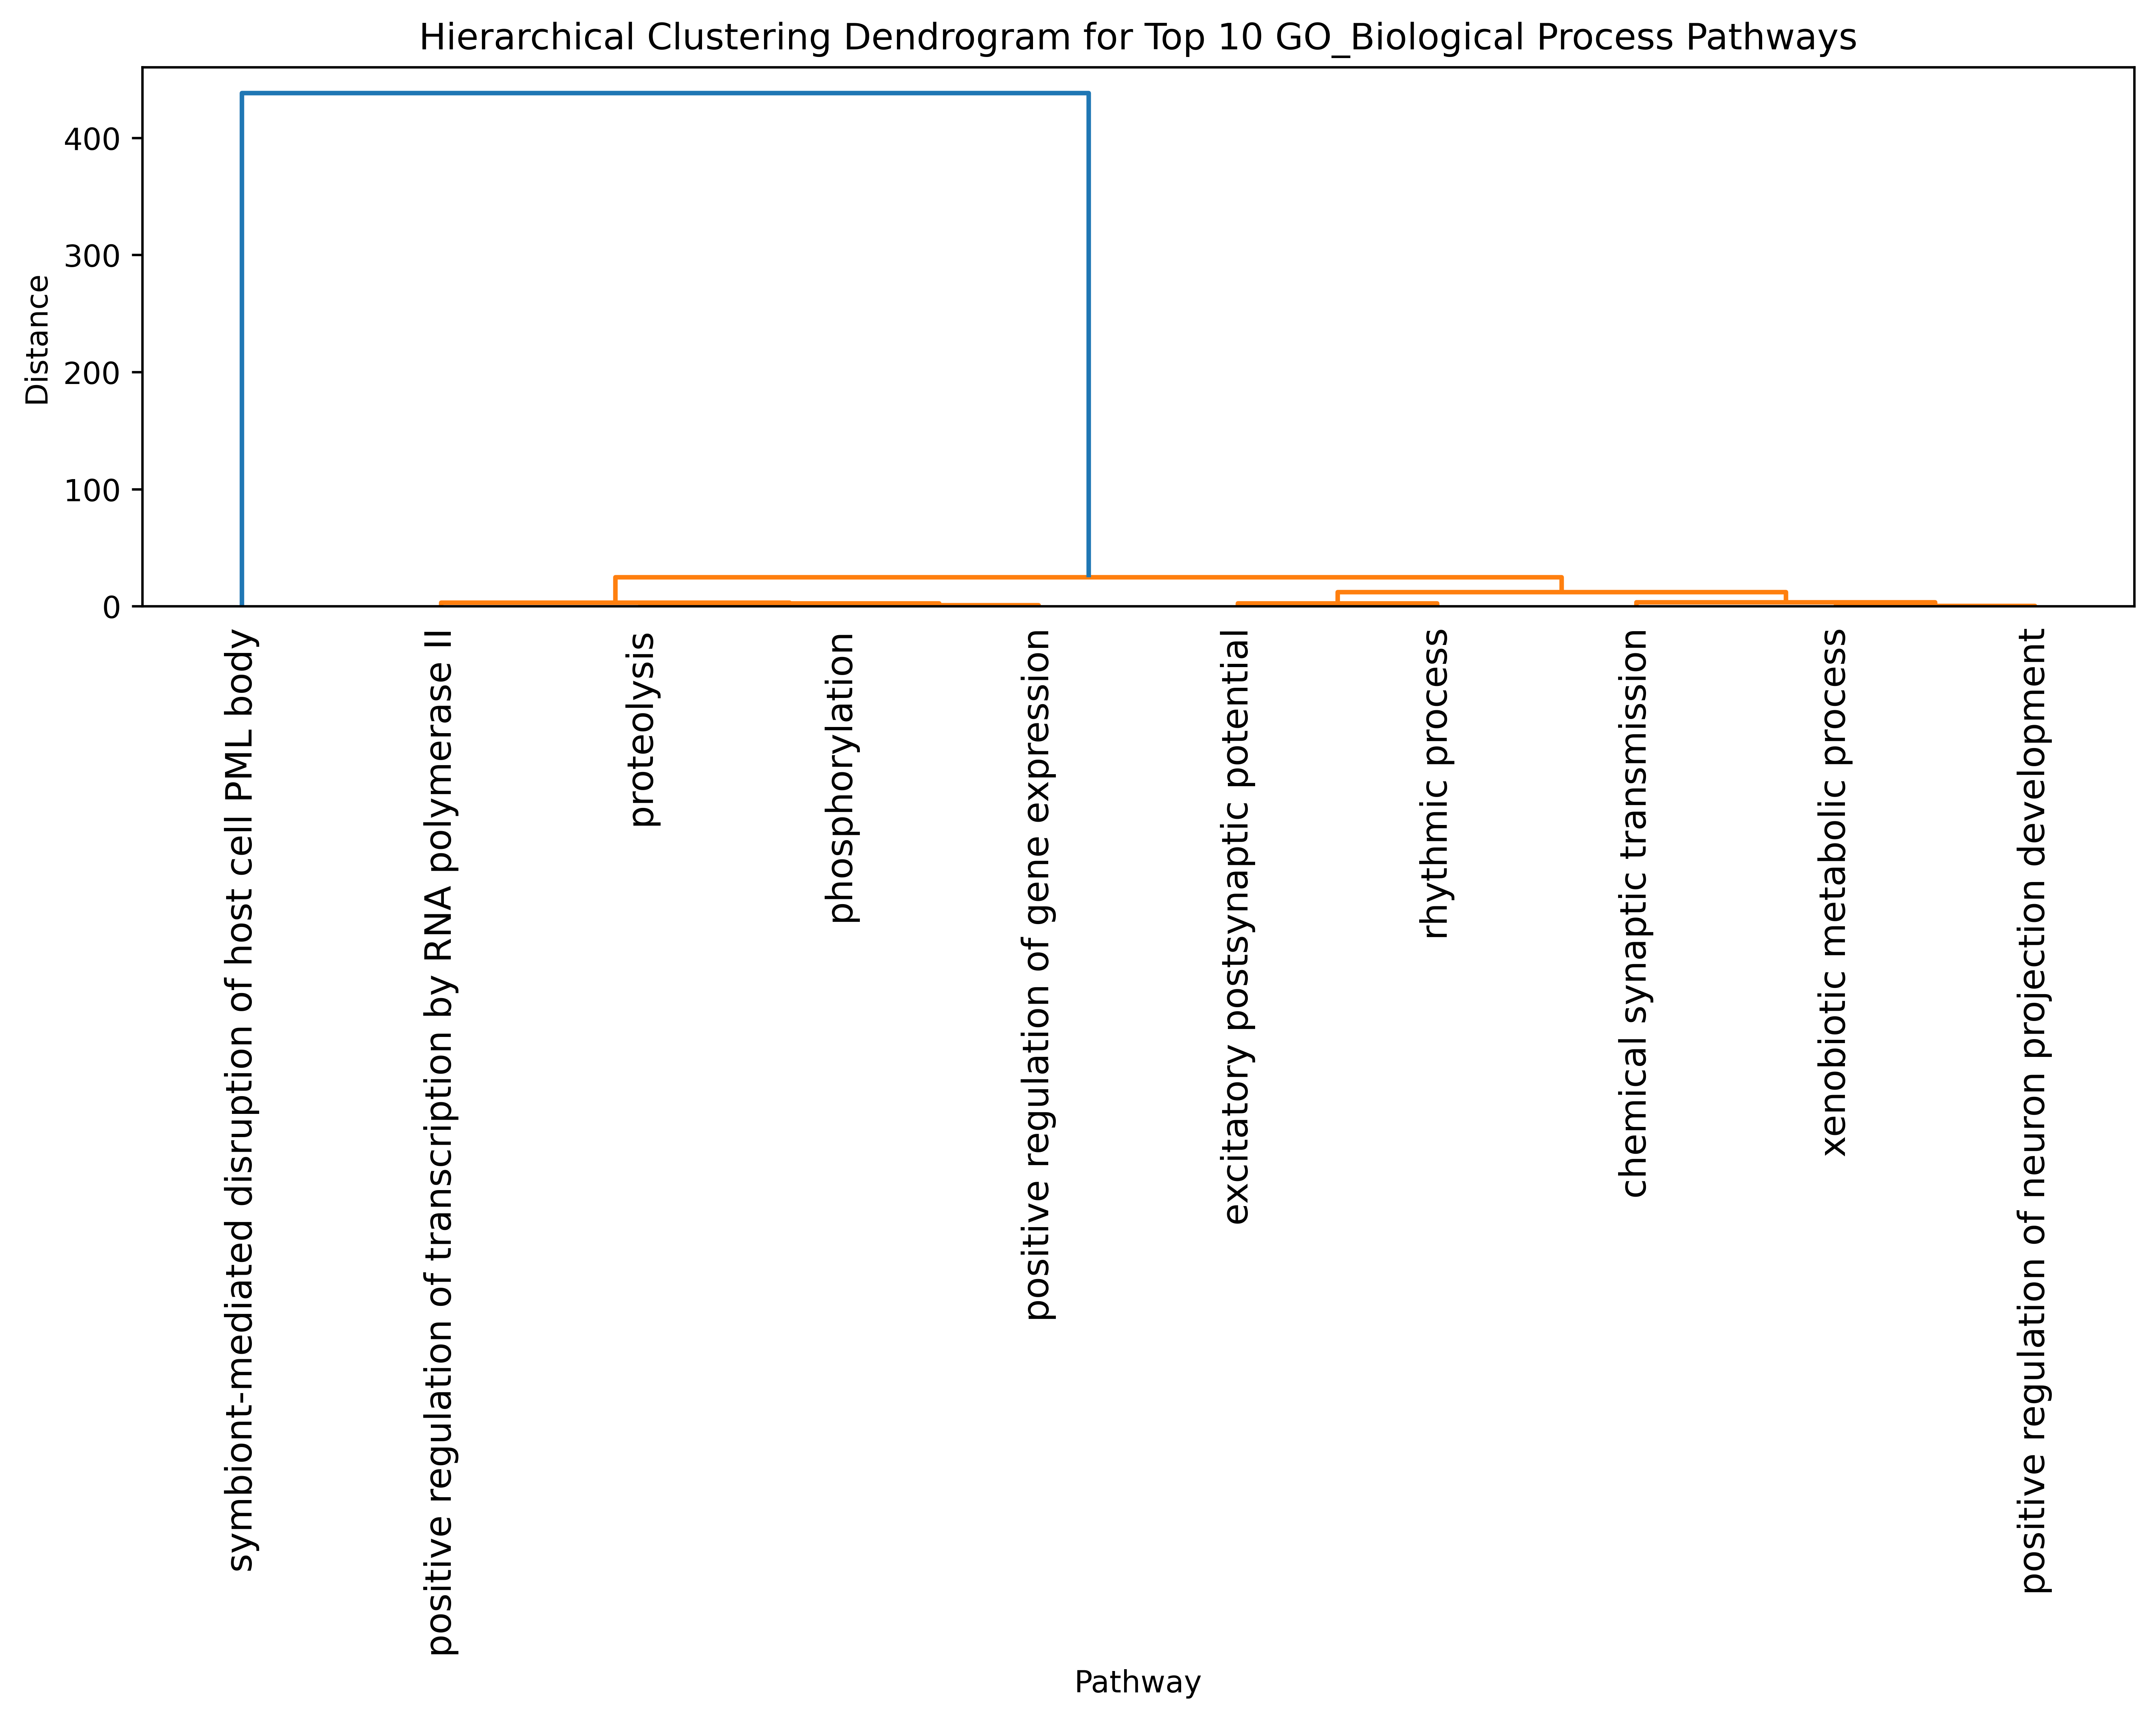

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['GO_Biological Process'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO_Biological Process Pathways')
plt.xlabel('Pathway')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram.png')
plt.show()


Index(['GO_Cellular Component', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


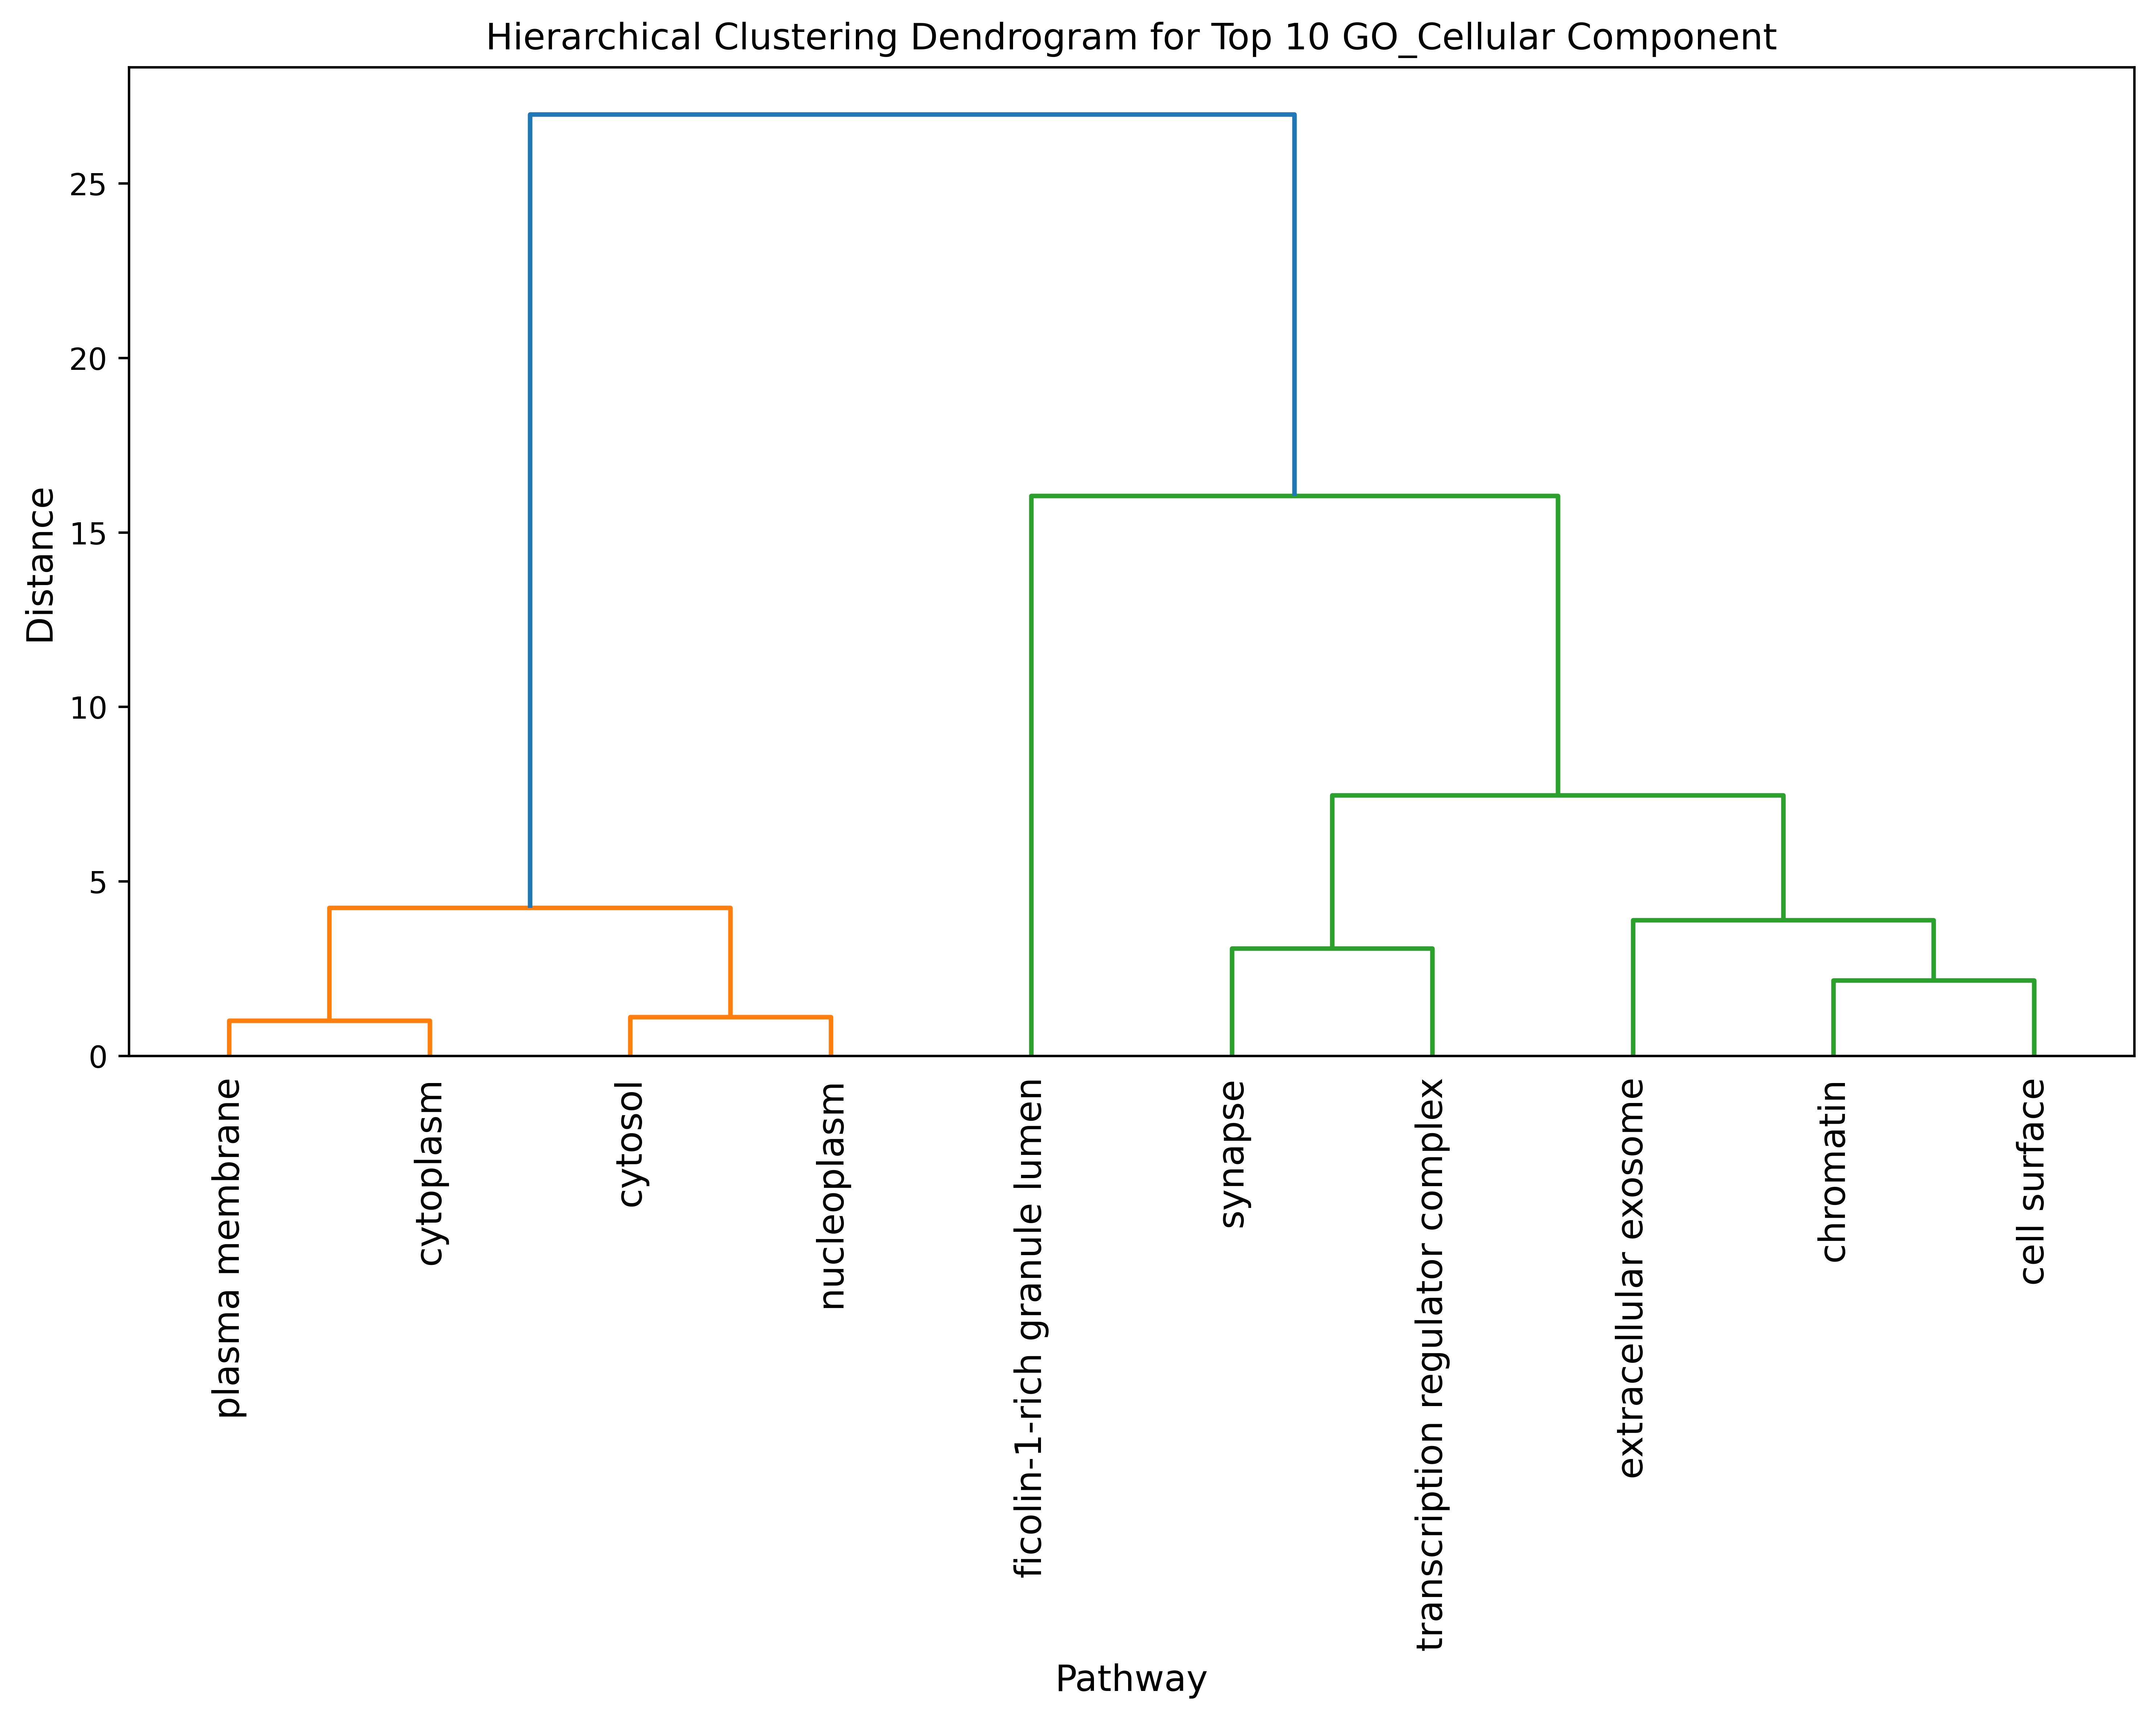

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_CC.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['GO_Cellular Component'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO_Cellular Component')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_GO_Cellular Component.png')
plt.show()


Index(['GO_Molecular Function', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


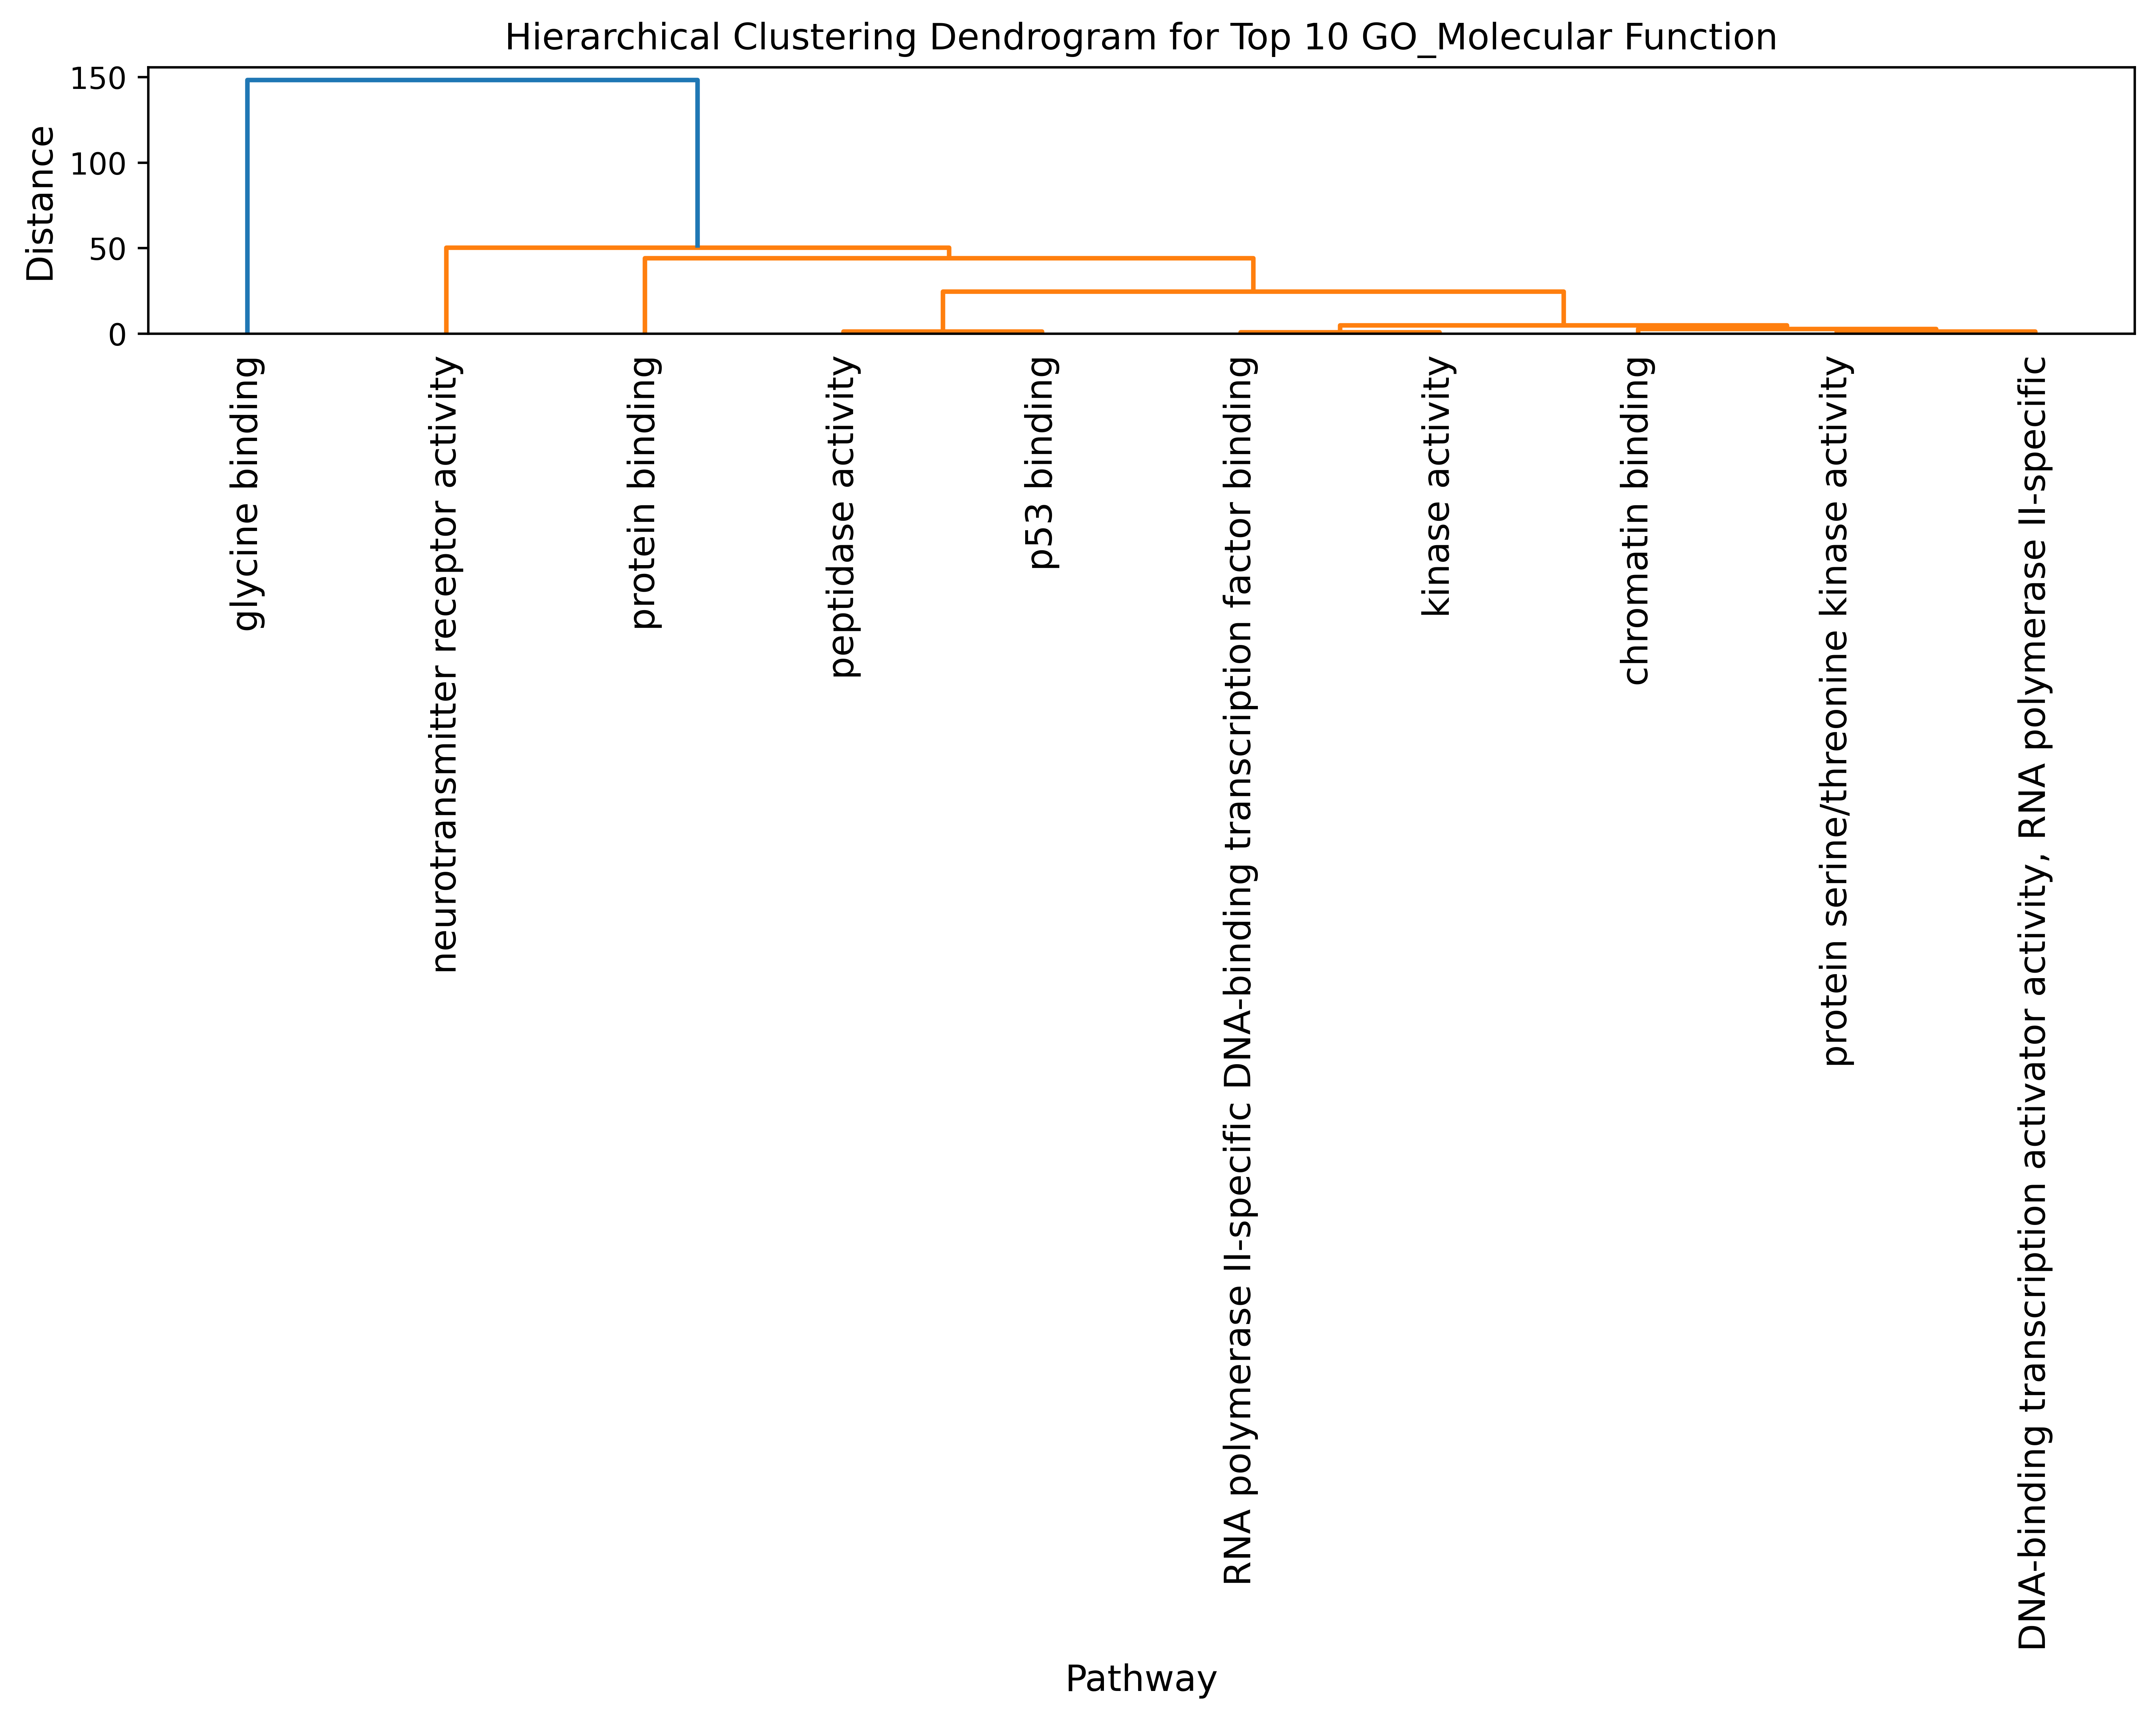

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '//content/GO_MF.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['GO_Molecular Function'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO_Molecular Function')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_GO_Molecular Function.png')
plt.show()


Index(['FA_Molecular Function', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


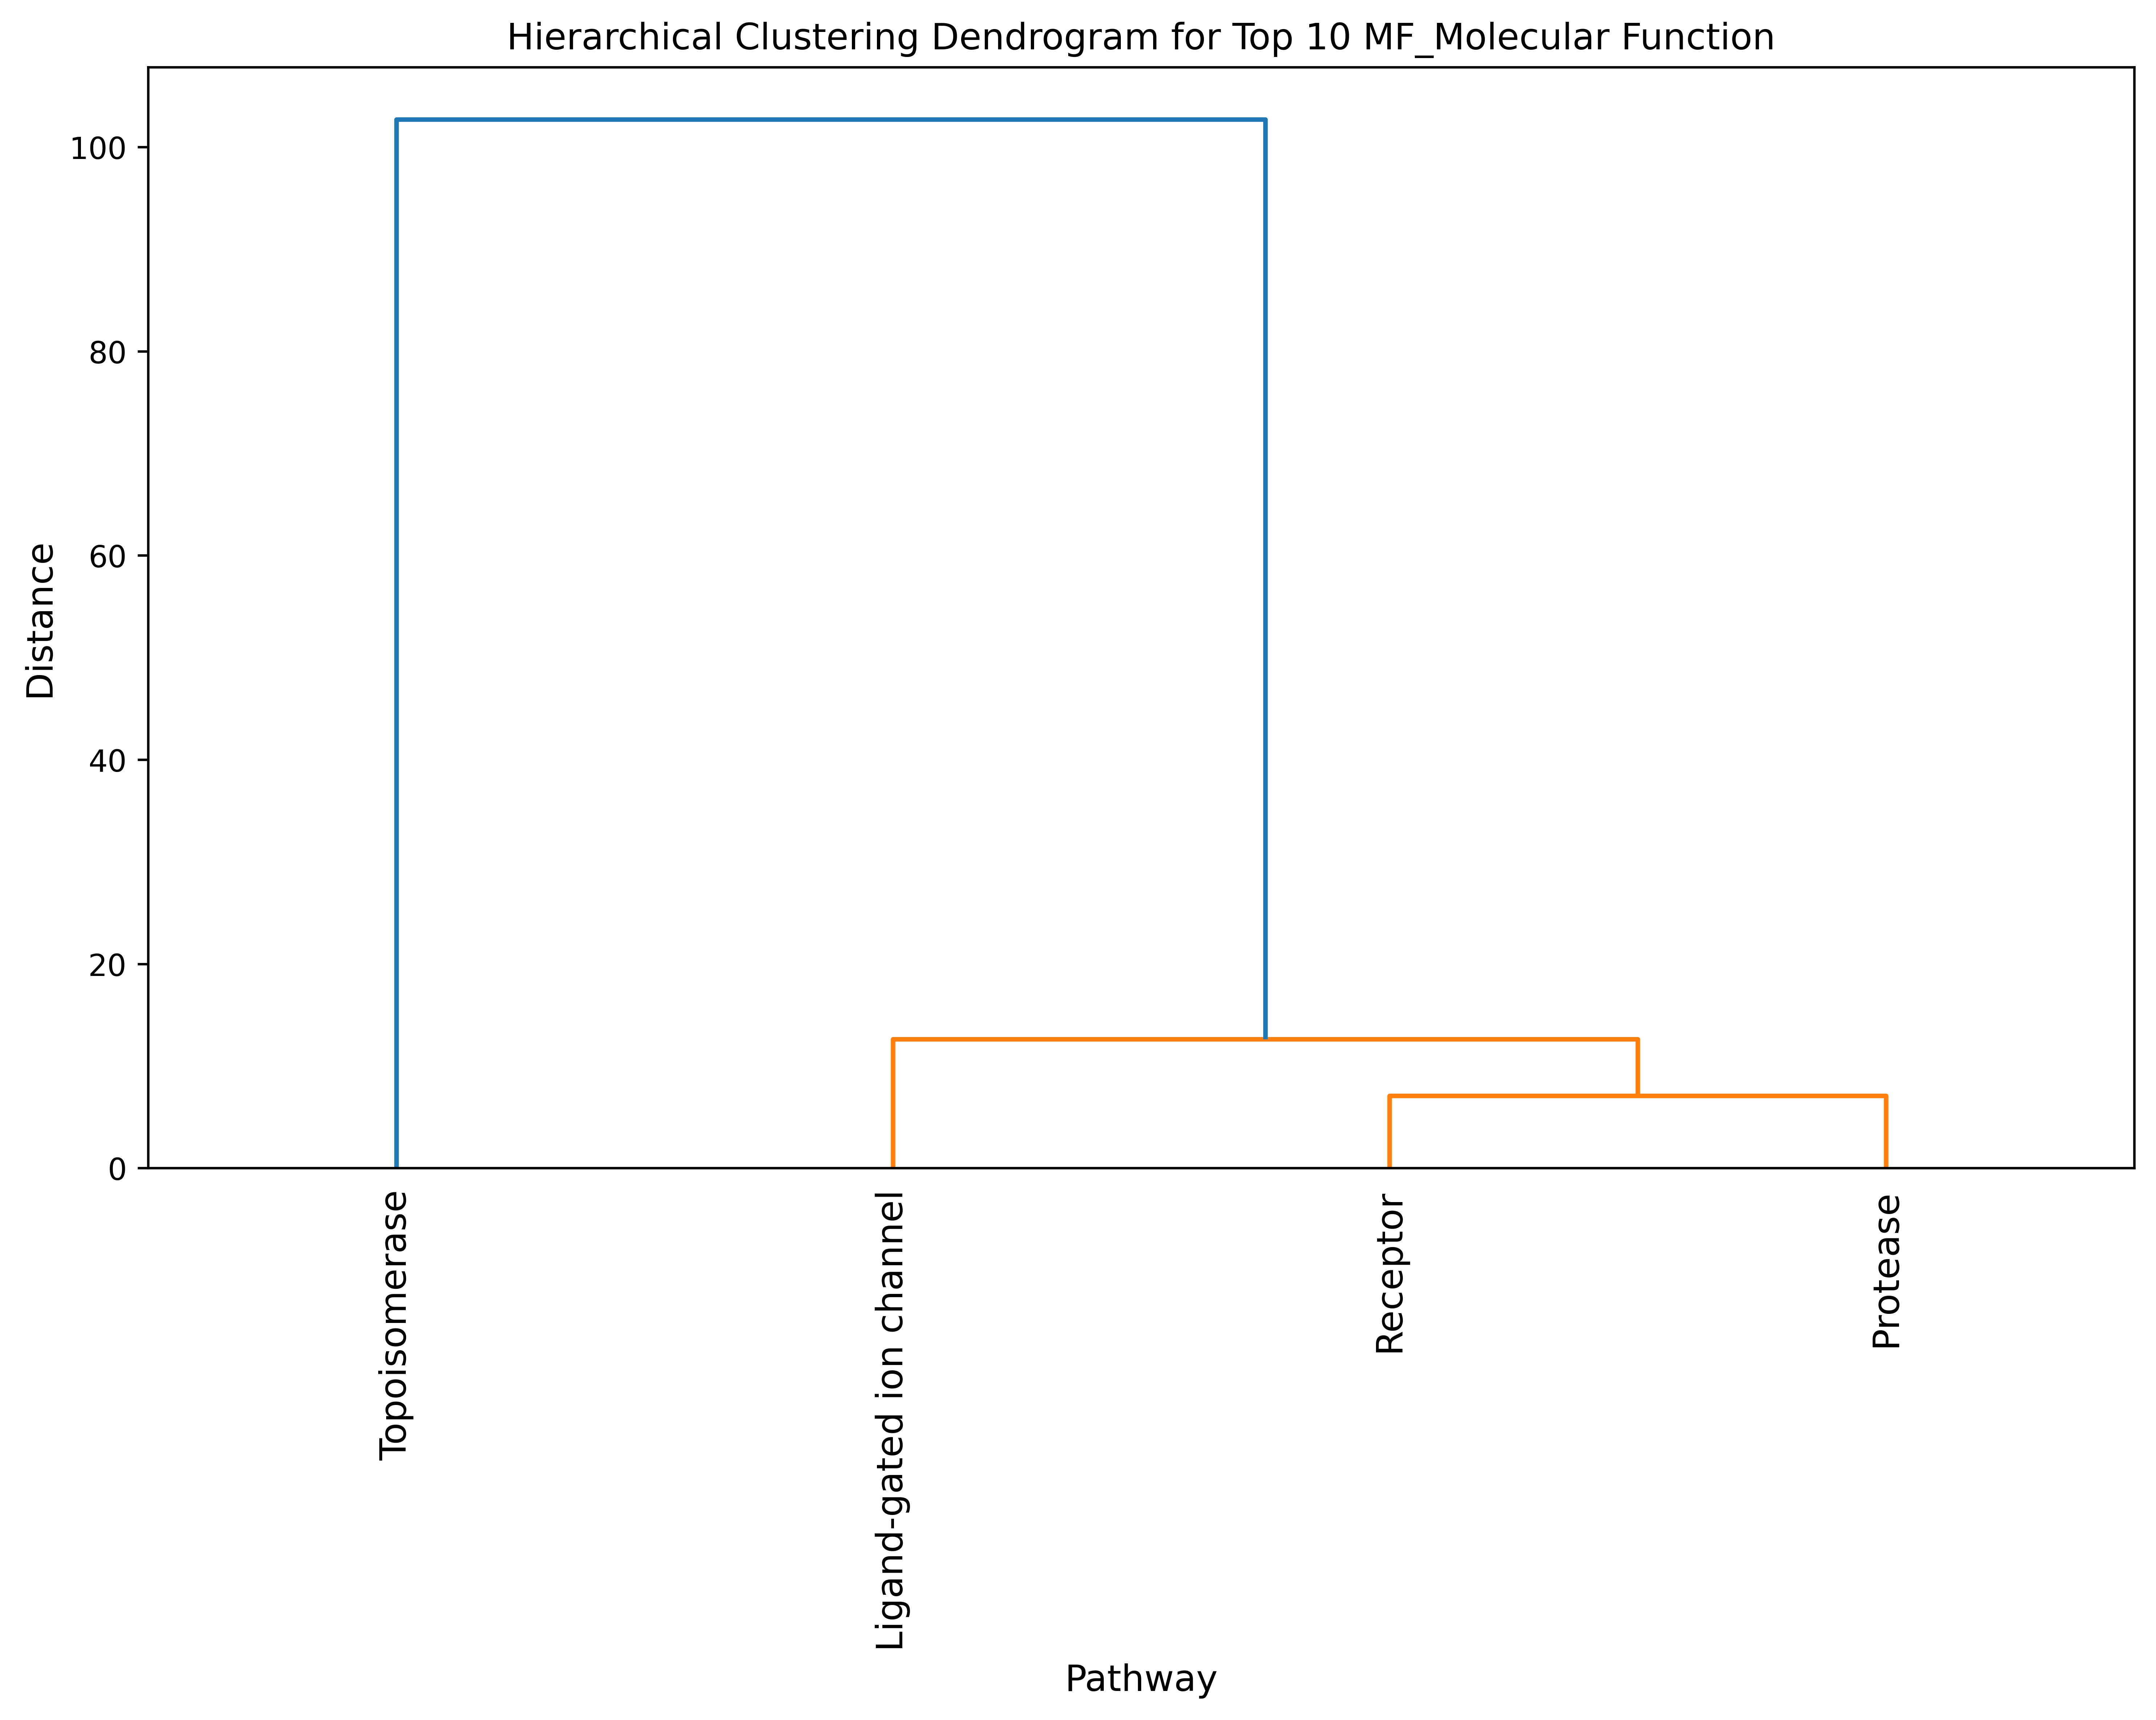

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/FA_MF.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['FA_Molecular Function'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 MF_Molecular Function')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_MF_Molecular Function.png')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/FA_CC.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['FA_Cellular Component'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 FA_Cellular Component')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_FA_Cellular Component.png')
plt.show()


Index(['FA_Cellular Component', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


ValueError: The number of observations cannot be determined on an empty distance matrix.

Index(['KEGG Pathway', 'Frequency', '%', 'PValue', 'Genes', 'List Total',
       'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni', 'Benjamini',
       'FDR'],
      dtype='object')


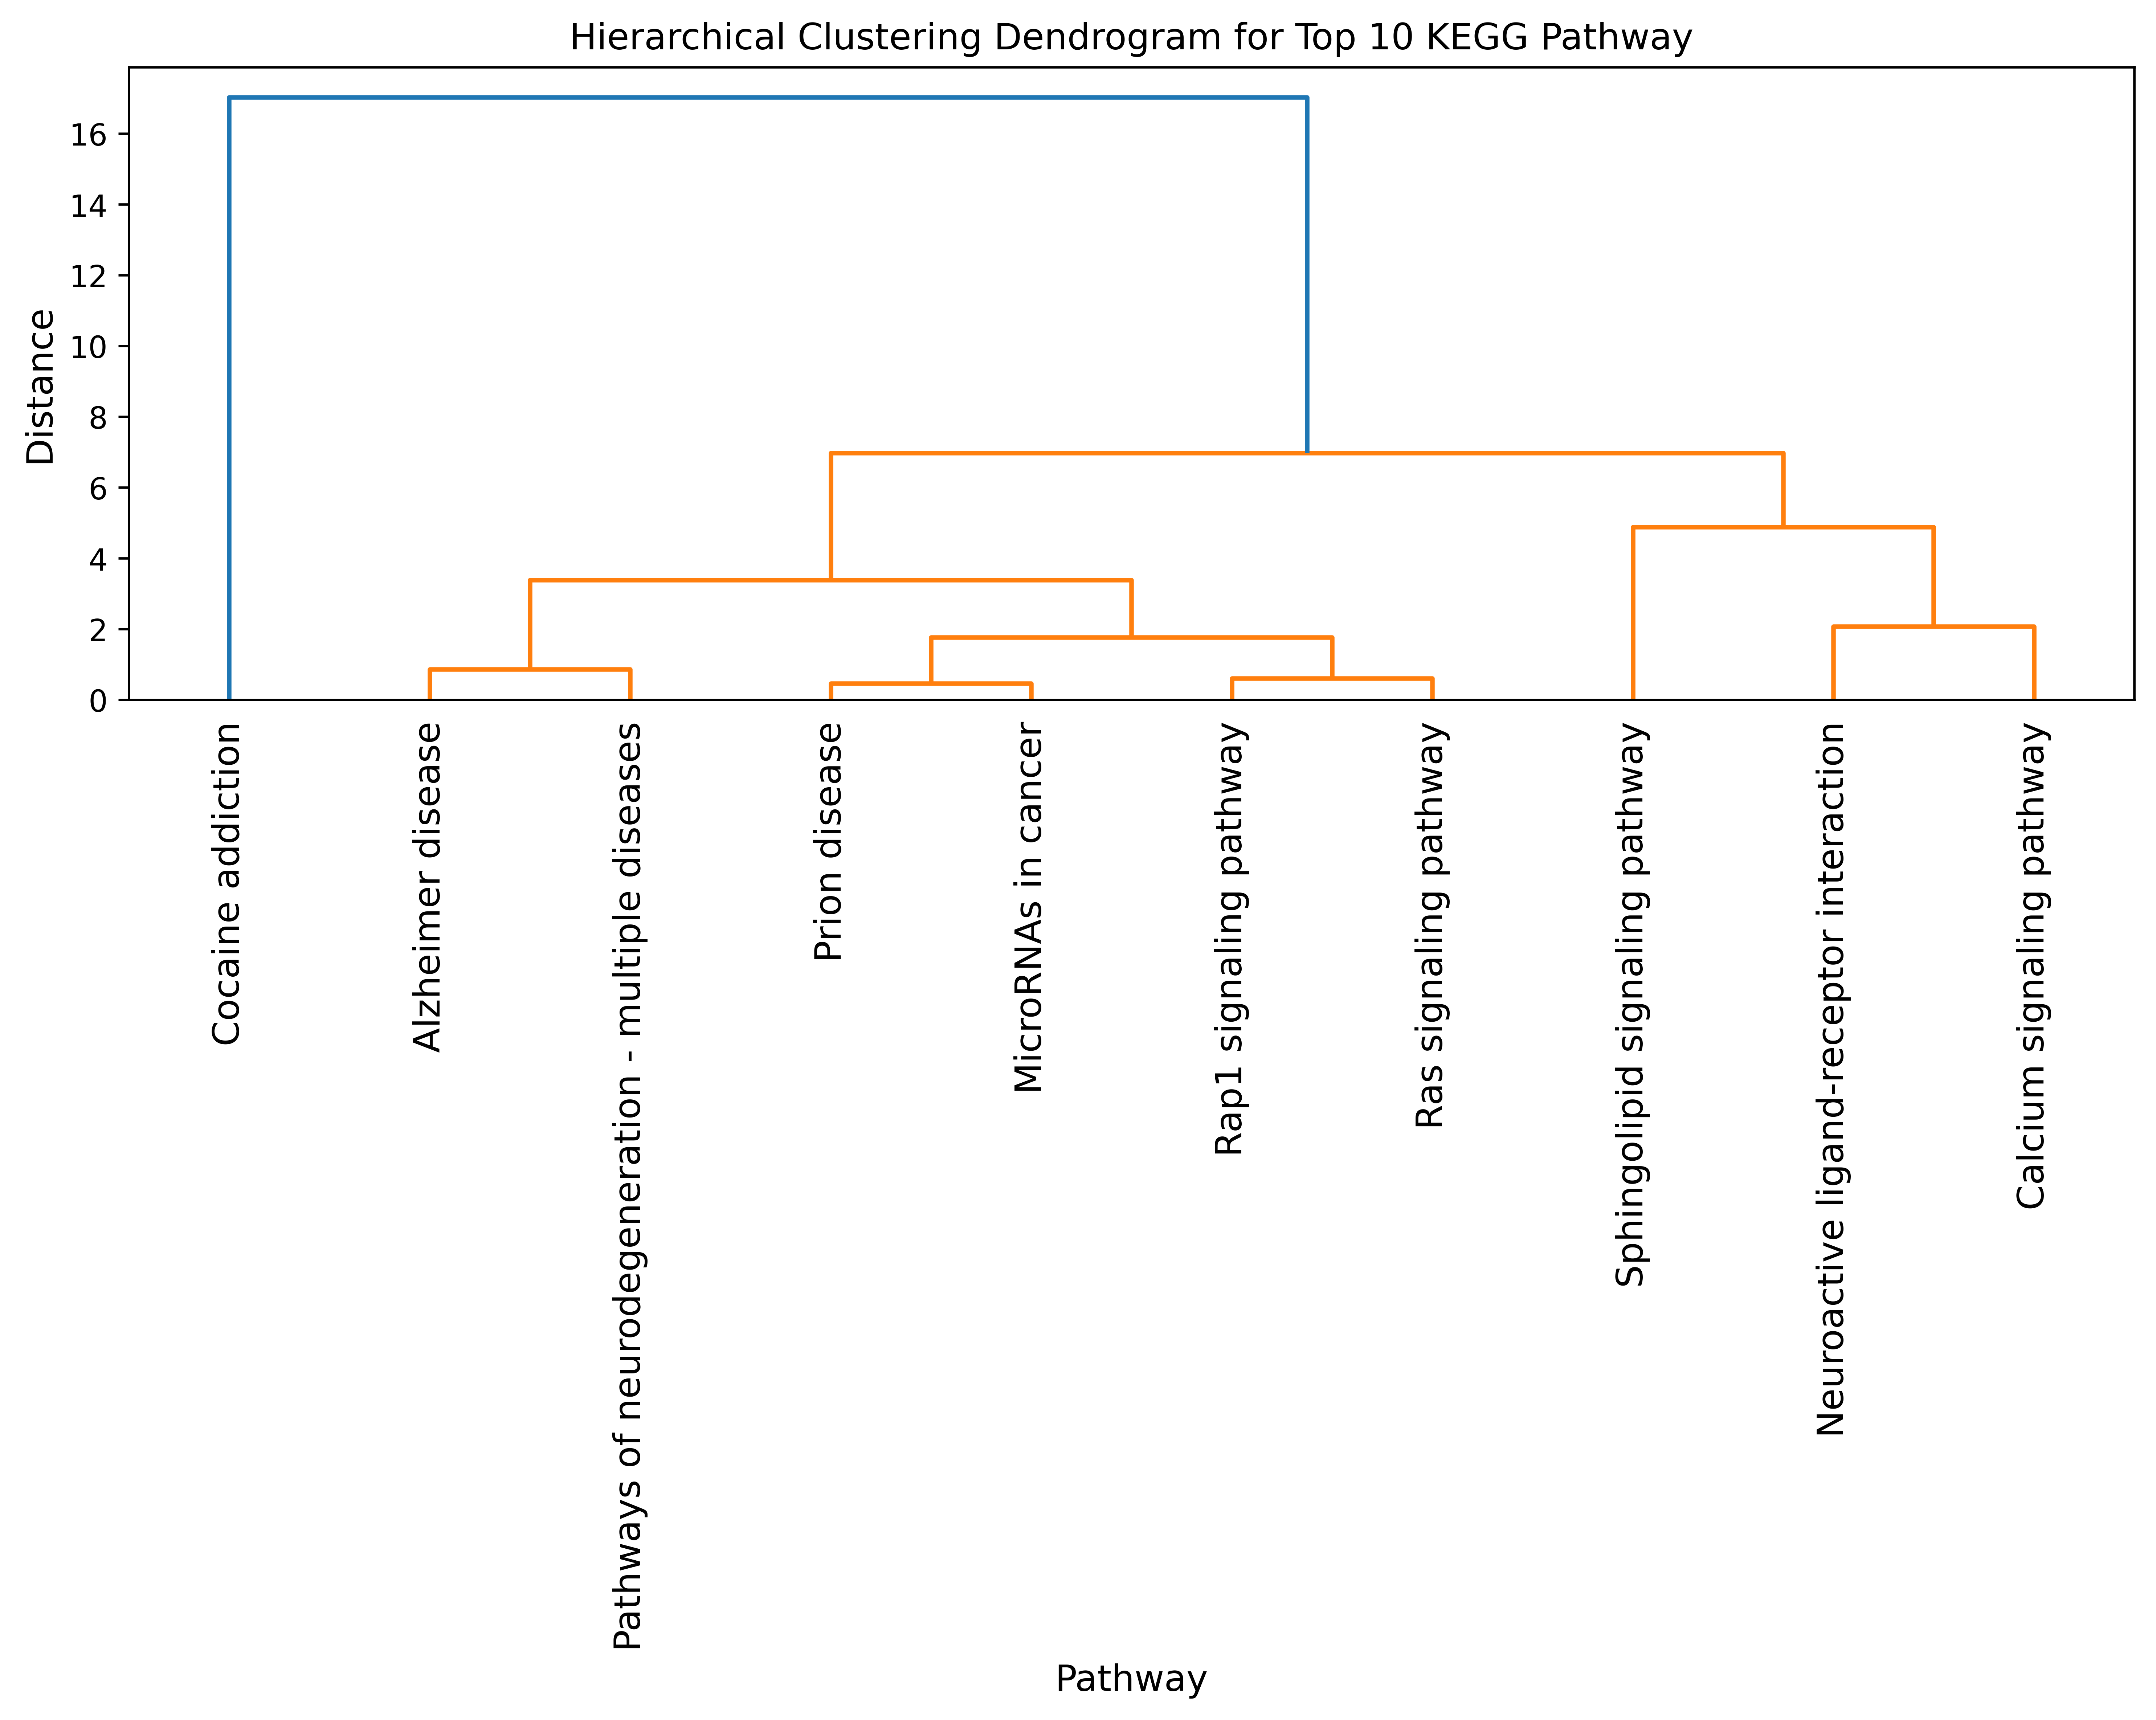

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/KEGG.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['KEGG Pathway'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 KEGG Pathway')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_KEGG Pathway.png')
plt.show()


Index(['Reactome Pathway', 'Frequency', '%', 'PValue', 'Genes', 'List Total',
       'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni', 'Benjamini',
       'FDR'],
      dtype='object')


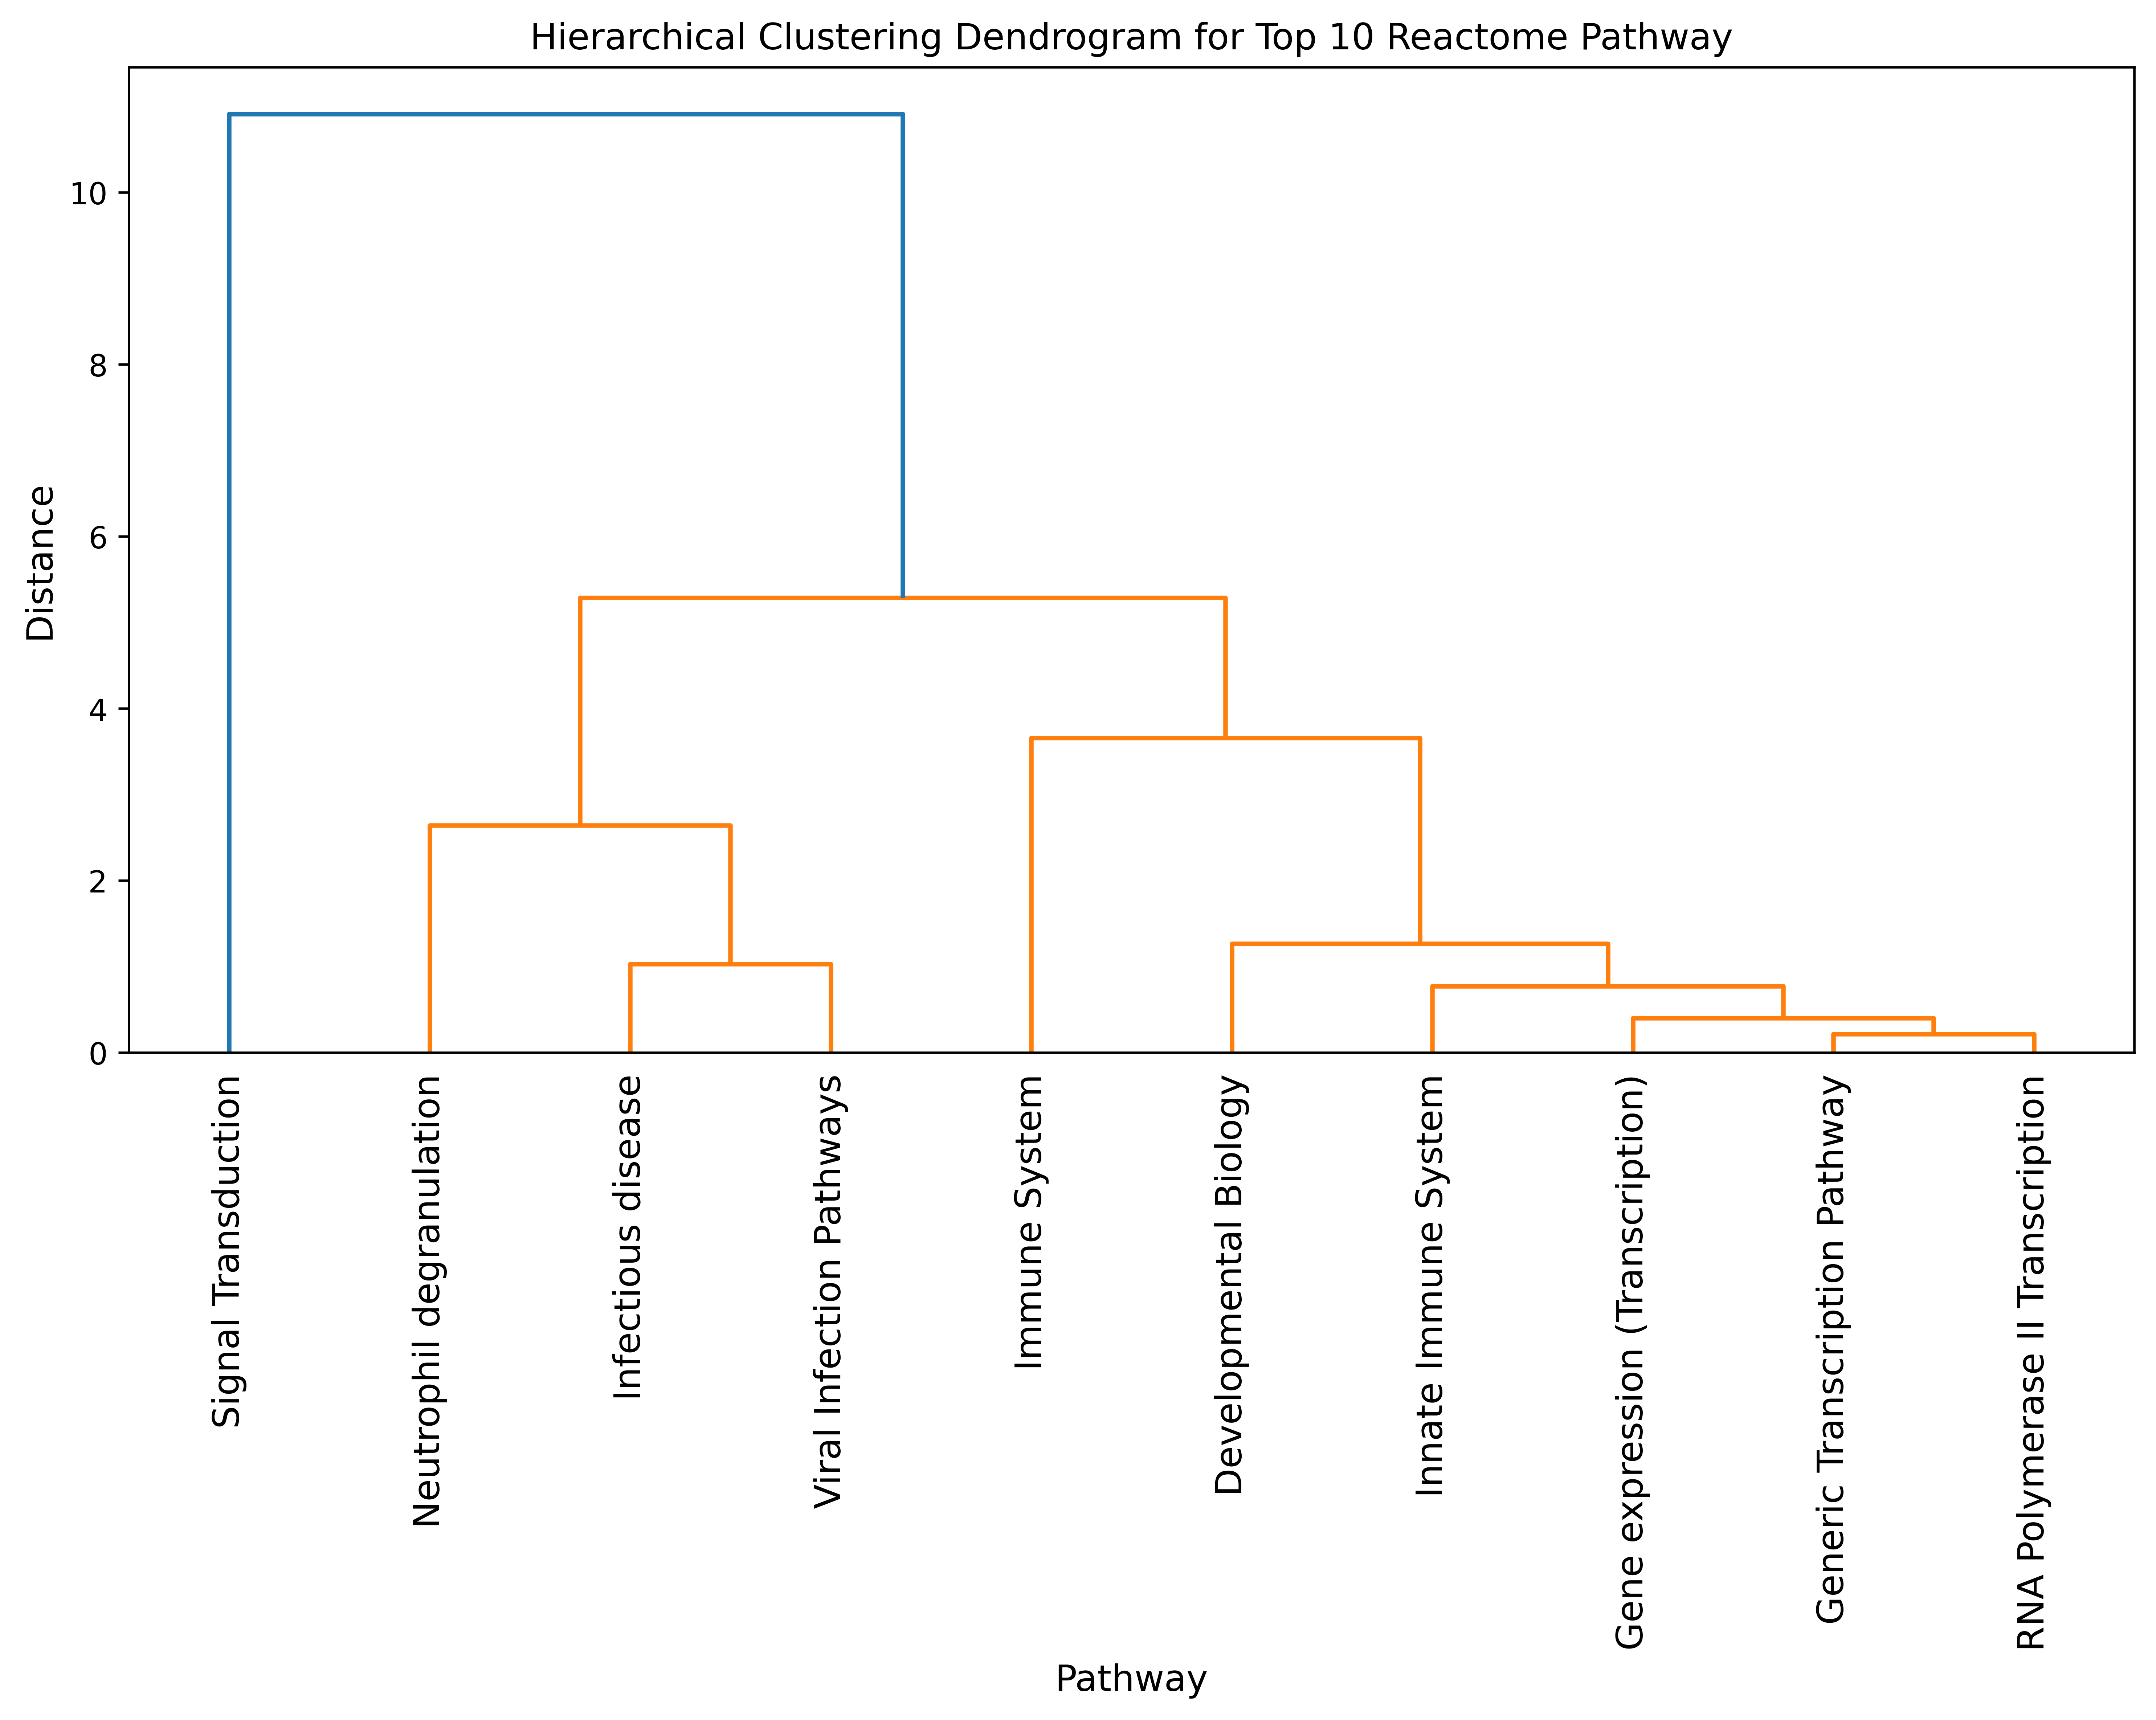

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/Reactome.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Filter the top 10 pathways by frequency
top_pathways = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering on these top pathways
# Using 'ward' method to calculate the linkage matrix
linkage_matrix = linkage(top_pathways[['Fold Enrichment', 'Frequency']], method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8), dpi=600)
dendrogram(linkage_matrix, labels=top_pathways['Reactome Pathway'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Reactome Pathway')
plt.xlabel('Pathway', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.savefig('/content/hierarchical_clustering_dendrogram_Reactome Pathway.png')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())


                               GO_Biological Process  Frequency          %  \
0                     chemical synaptic transmission          6  15.384615   
1                                        proteolysis          6  15.384615   
2  symbiont-mediated disruption of host cell PML ...          2   5.128205   
3                  excitatory postsynaptic potential          3   7.692308   
4                                   rhythmic process          3   7.692308   

     PValue                                   Genes  List Total  Pop Hits  \
0  0.000079  GLRA1, HTR7, HTR2C, GRIN2B, GRIN1, GLS          39       232   
1  0.003998    DPP8, ATG4B, PRCP, CAPN1, CTSD, KLK7          39       554   
2  0.005766                         CSNK2A1, CSNK2B          39         3   
3  0.008030                    GLRA1, GRIN2B, GRIN1          39        70   
4  0.010133                    TOP2A, CSNK2A1, TOP1          39        79   

   Pop Total  Fold Enrichment  Bonferroni  Benjamini       FDR  
0  

<ipython-input-2-e264dc3a0452>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


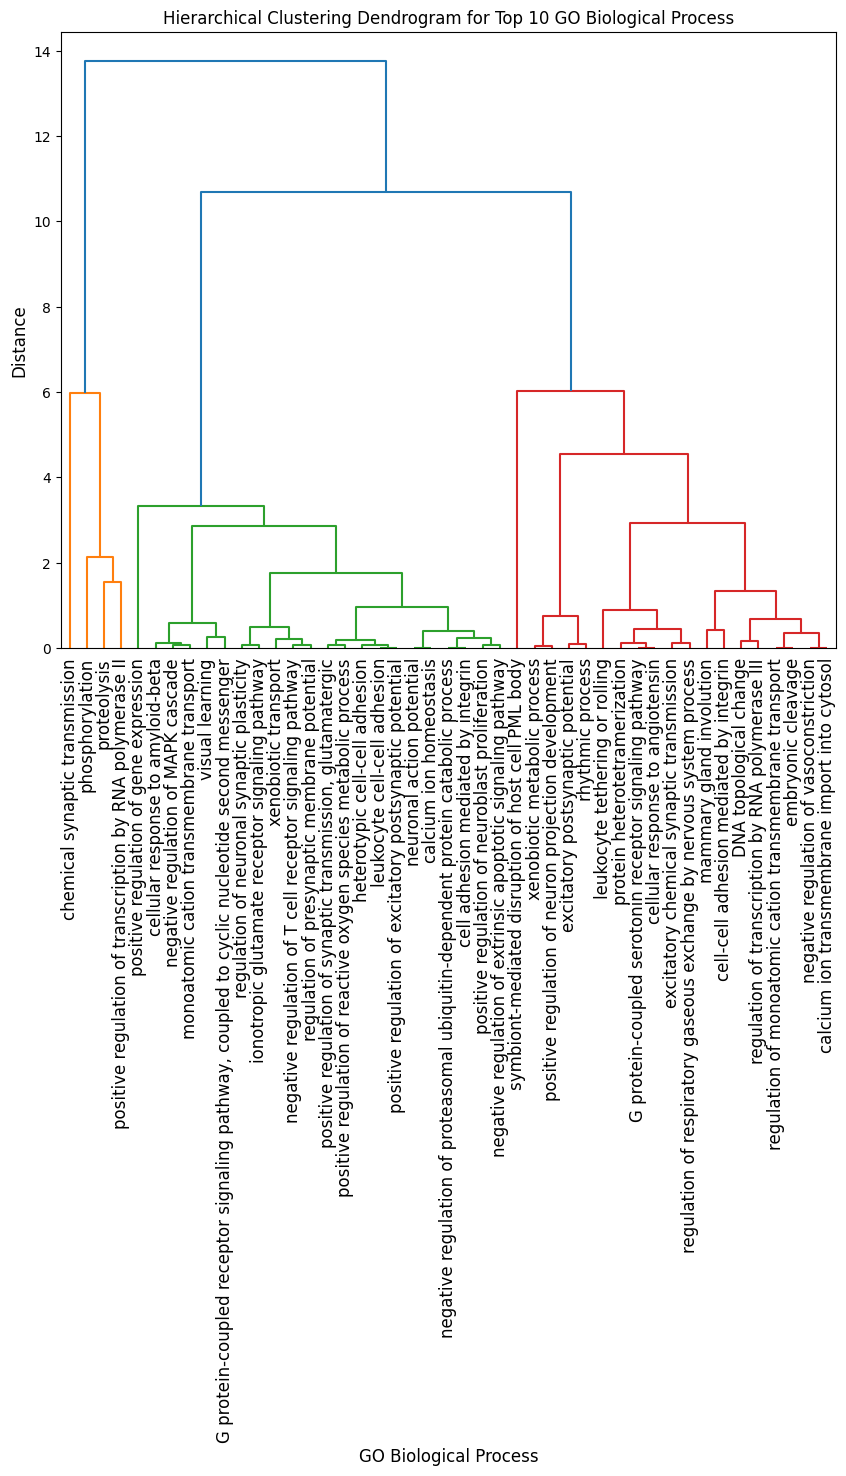

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Assuming df is your DataFrame after loading the data
# Select relevant columns for clustering
data_for_clustering = df[['Frequency', '%', 'PValue', 'Fold Enrichment', 'FDR']]

# Normalize the data to ensure each feature contributes equally
# This step is crucial as different scales can distort the distance calculations
data_normalized = (data_for_clustering - data_for_clustering.mean()) / data_for_clustering.std()

# Perform hierarchical clustering
linkage_matrix = linkage(data_normalized, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=df['GO_Biological Process'].values, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO Biological Process')
plt.xlabel('GO Biological Process', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()


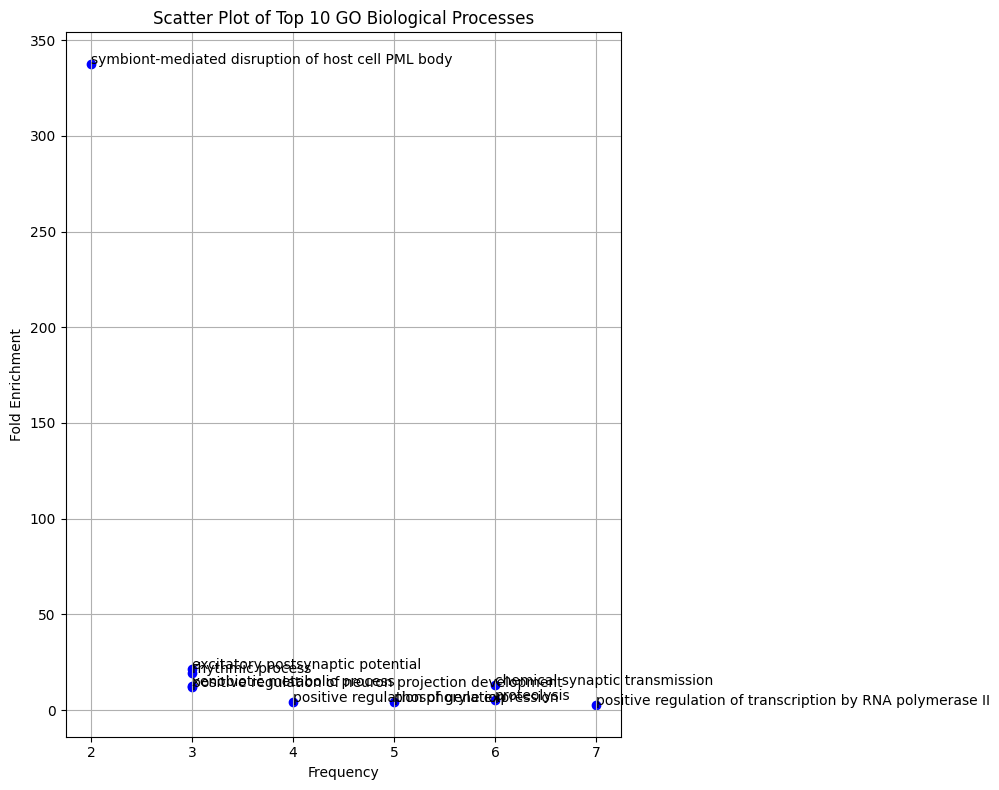

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_excel('/content/GO_BP.xlsx')

# Assuming you've already filtered the top 10 based on 'Frequency' or another criterion
top_10_processes = df.nlargest(10, 'Frequency')

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(top_10_processes['Frequency'], top_10_processes['Fold Enrichment'], color='blue')

# Annotate each point with the GO Biological Process name
for i, txt in enumerate(top_10_processes['GO_Biological Process']):
    plt.annotate(txt, (top_10_processes['Frequency'].iat[i], top_10_processes['Fold Enrichment'].iat[i]))

plt.title('Scatter Plot of Top 10 GO Biological Processes')
plt.xlabel('Frequency')
plt.ylabel('Fold Enrichment')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['GO_Biological Process', 'Frequency', '%', 'PValue', 'Genes',
       'List Total', 'Pop Hits', 'Pop Total', 'Fold Enrichment', 'Bonferroni',
       'Benjamini', 'FDR'],
      dtype='object')


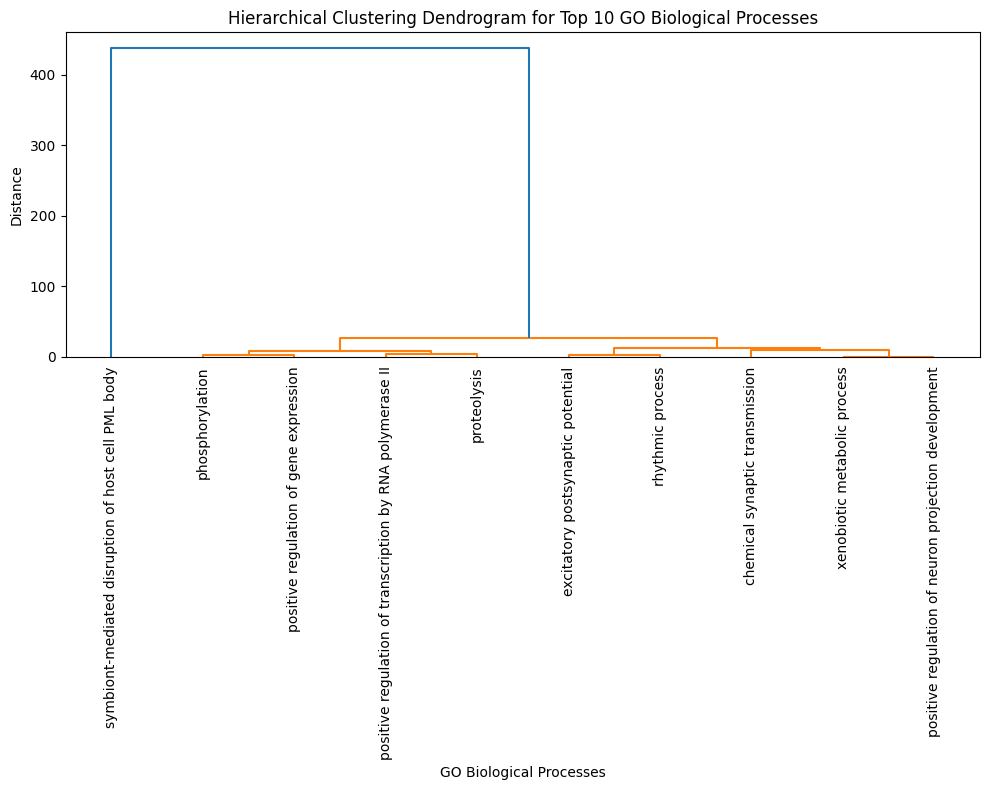

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Display the column names to understand the structure of the data
print(df.columns)

# Select the top 10 processes by a meaningful attribute, such as 'Frequency'
top_processes = df.nlargest(10, 'Frequency')

# Perform hierarchical clustering
# Here we use multiple attributes, ensure to select numeric and relevant columns
data_for_clustering = top_processes[['Frequency', '%', 'PValue', 'Fold Enrichment', 'FDR']].fillna(0)
linkage_matrix = linkage(data_for_clustering, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=top_processes['GO_Biological Process'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO Biological Processes')
plt.xlabel('GO Biological Processes')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Linkage Matrix:
 [[7.00000000e+00 8.00000000e+00 3.03520908e-01 2.00000000e+00]
 [5.00000000e+00 6.00000000e+00 2.47052531e+00 2.00000000e+00]
 [3.00000000e+00 4.00000000e+00 2.75923773e+00 2.00000000e+00]
 [0.00000000e+00 2.00000000e+00 3.82771594e+00 2.00000000e+00]
 [1.20000000e+01 1.30000000e+01 7.78917716e+00 4.00000000e+00]
 [1.00000000e+00 1.00000000e+01 9.60819953e+00 3.00000000e+00]
 [1.10000000e+01 1.50000000e+01 1.28578232e+01 5.00000000e+00]
 [1.40000000e+01 1.60000000e+01 2.69946771e+01 9.00000000e+00]
 [9.00000000e+00 1.70000000e+01 4.38504157e+02 1.00000000e+01]]


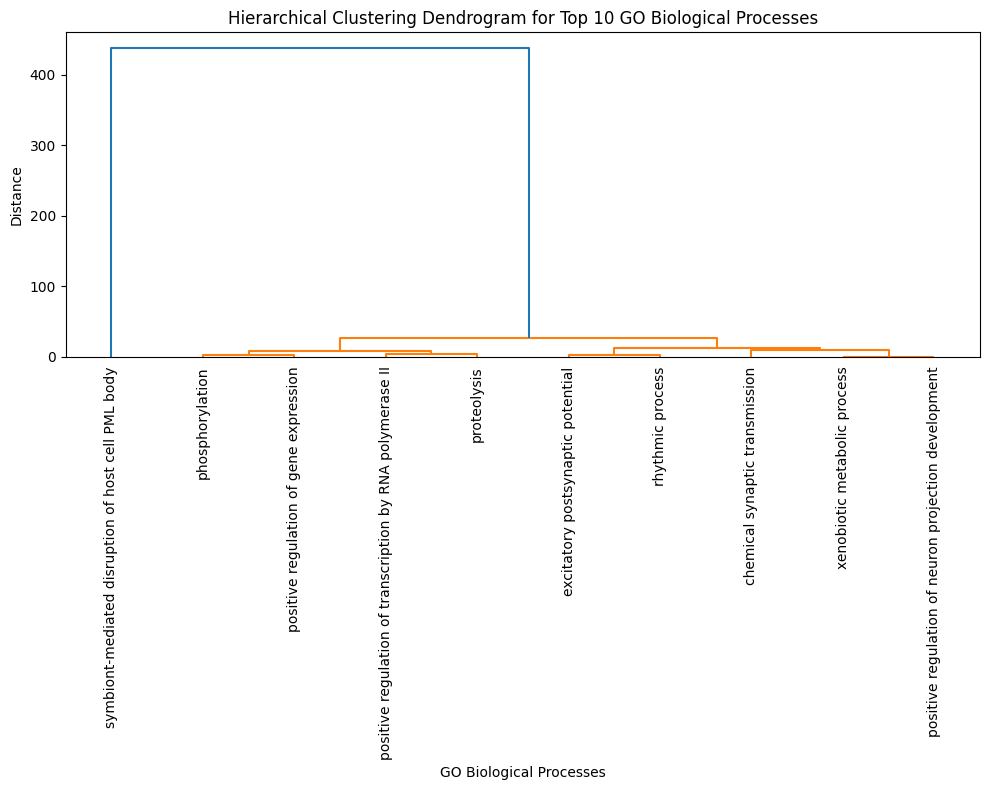

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/GO_BP.xlsx'
df = pd.read_excel(file_path)

# Select the top 10 processes by 'Frequency'
top_processes = df.nlargest(10, 'Frequency')

# Prepare data for clustering
data_for_clustering = top_processes[['Frequency', '%', 'PValue', 'Fold Enrichment', 'FDR']].fillna(0)

# Perform hierarchical clustering
linkage_matrix = linkage(data_for_clustering, method='ward')

# Output the linkage matrix
print("Linkage Matrix:\n", linkage_matrix)

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=top_processes['GO_Biological Process'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 GO Biological Processes')
plt.xlabel('GO Biological Processes')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
